In [414]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [415]:
pip install liac-arff

Note: you may need to restart the kernel to use updated packages.


In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_df = pd.read_csv('data/data_set_label.csv')
file_df.drop(columns=['data_split'],inplace=True)

In [417]:
file_df.shape

(796, 23)

In [418]:
X = file_df.loc[:, ['filename']].to_numpy()
y = file_df.loc[:, ["Healthy Lifestyle and Weight Loss", "Weight Lifting", "Running", "Yoga", "Haircare", "Makeup", "Skincare", "Outfit", "Accommodation", "Adventure", "Culture", "Food and drink"]].to_numpy()

In [419]:
X

array([['Beauty_1.mp4'],
       ['Beauty_2.mp4'],
       ['Beauty_3.mp4'],
       ['Beauty_4.mp4'],
       ['Beauty_5.mp4'],
       ['Beauty_6.mp4'],
       ['Beauty_7.mp4'],
       ['Beauty_8.mp4'],
       ['Beauty_9.mp4'],
       ['Beauty_10.mp4'],
       ['Beauty_11.mp4'],
       ['Beauty_12.mp4'],
       ['Beauty_13.mp4'],
       ['Beauty_14.mp4'],
       ['Beauty_15.mp4'],
       ['Beauty_16.mp4'],
       ['Beauty_17.mp4'],
       ['Beauty_18.mp4'],
       ['Beauty_19.mp4'],
       ['Beauty_20.mp4'],
       ['Beauty_21.mp4'],
       ['Beauty_22.mp4'],
       ['Beauty_23.mp4'],
       ['Beauty_24.mp4'],
       ['Beauty_25.mp4'],
       ['Beauty_26.mp4'],
       ['Beauty_27.mp4'],
       ['Beauty_28.mp4'],
       ['Beauty_29.mp4'],
       ['Beauty_30.mp4'],
       ['Beauty_31.mp4'],
       ['Beauty_32.mp4'],
       ['Beauty_33.mp4'],
       ['Beauty_34.mp4'],
       ['Beauty_35.mp4'],
       ['Beauty_36.mp4'],
       ['Beauty_37.mp4'],
       ['Beauty_38.mp4'],
       ['Beauty_39.mp

In [420]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [421]:
from skmultilearn.dataset import load_dataset
from skmultilearn.model_selection import iterative_train_test_split

#X, y, _, _ = load_dataset('scene', 'undivided')

# Split the data into training, testing, and validation sets
X_train, y_train, X_temp, y_temp = iterative_train_test_split(X, y, test_size=0.2)
X_test, y_test, X_val, y_val = iterative_train_test_split(X_temp, y_temp, test_size=0.5)


In [422]:
X_train

array([['Beauty_2.mp4'],
       ['Beauty_4.mp4'],
       ['Beauty_6.mp4'],
       ['Beauty_8.mp4'],
       ['Beauty_10.mp4'],
       ['Beauty_12.mp4'],
       ['Beauty_14.mp4'],
       ['Beauty_16.mp4'],
       ['Beauty_18.mp4'],
       ['Beauty_20.mp4'],
       ['Beauty_22.mp4'],
       ['Beauty_24.mp4'],
       ['Beauty_26.mp4'],
       ['Beauty_28.mp4'],
       ['Beauty_30.mp4'],
       ['Beauty_32.mp4'],
       ['Beauty_34.mp4'],
       ['Beauty_36.mp4'],
       ['Beauty_37.mp4'],
       ['Beauty_38.mp4'],
       ['Beauty_40.mp4'],
       ['Beauty_41.mp4'],
       ['Beauty_44.mp4'],
       ['Beauty_47.mp4'],
       ['Beauty_49.mp4'],
       ['Beauty_50.mp4'],
       ['Beauty_52.mp4'],
       ['Beauty_54.mp4'],
       ['Beauty_57.mp4'],
       ['Beauty_58.mp4'],
       ['Beauty_61.mp4'],
       ['Beauty_63.mp4'],
       ['Beauty_65.mp4'],
       ['Beauty_67.mp4'],
       ['Beauty_68.mp4'],
       ['Beauty_70.mp4'],
       ['Beauty_73.mp4'],
       ['Beauty_74.mp4'],
       ['Beauty_

In [423]:
X_train.shape

(636, 1)

In [424]:
X_test

array([['Beauty_1.mp4'],
       ['Beauty_3.mp4'],
       ['Beauty_7.mp4'],
       ['Beauty_13.mp4'],
       ['Beauty_15.mp4'],
       ['Beauty_21.mp4'],
       ['Beauty_25.mp4'],
       ['Beauty_27.mp4'],
       ['Beauty_31.mp4'],
       ['Beauty_35.mp4'],
       ['Beauty_42.mp4'],
       ['Beauty_45.mp4'],
       ['Beauty_51.mp4'],
       ['Beauty_53.mp4'],
       ['Beauty_59.mp4'],
       ['Beauty_62.mp4'],
       ['Beauty_66.mp4'],
       ['Beauty_71.mp4'],
       ['Beauty_72.mp4'],
       ['Beauty_118.mp4'],
       ['Beauty_121.mp4'],
       ['Beauty_127.mp4'],
       ['Beauty_129.mp4'],
       ['Beauty_136.mp4'],
       ['Beauty_140.mp4'],
       ['Beauty_145.mp4'],
       ['Beauty_177.mp4'],
       ['Beauty_181.mp4'],
       ['Beauty_185.mp4'],
       ['Sport_5.mp4'],
       ['Sport_11.mp4'],
       ['Sport_13.mp4'],
       ['Sport_19.mp4'],
       ['Sport_21.mp4'],
       ['Sport_25.mp4'],
       ['Sport_31.mp4'],
       ['Sport_66.mp4'],
       ['Sport_72.mp4'],
       ['Sport_

In [425]:
X_test.shape

(80, 1)

In [426]:
X_val

array([['Beauty_5.mp4'],
       ['Beauty_9.mp4'],
       ['Beauty_11.mp4'],
       ['Beauty_17.mp4'],
       ['Beauty_19.mp4'],
       ['Beauty_23.mp4'],
       ['Beauty_29.mp4'],
       ['Beauty_33.mp4'],
       ['Beauty_39.mp4'],
       ['Beauty_43.mp4'],
       ['Beauty_46.mp4'],
       ['Beauty_48.mp4'],
       ['Beauty_55.mp4'],
       ['Beauty_56.mp4'],
       ['Beauty_60.mp4'],
       ['Beauty_64.mp4'],
       ['Beauty_69.mp4'],
       ['Beauty_75.mp4'],
       ['Beauty_123.mp4'],
       ['Beauty_125.mp4'],
       ['Beauty_132.mp4'],
       ['Beauty_134.mp4'],
       ['Beauty_138.mp4'],
       ['Beauty_143.mp4'],
       ['Beauty_174.mp4'],
       ['Beauty_179.mp4'],
       ['Beauty_183.mp4'],
       ['Beauty_210.mp4'],
       ['Sport_3.mp4'],
       ['Sport_7.mp4'],
       ['Sport_9.mp4'],
       ['Sport_15.mp4'],
       ['Sport_17.mp4'],
       ['Sport_23.mp4'],
       ['Sport_27.mp4'],
       ['Sport_29.mp4'],
       ['Sport_68.mp4'],
       ['Sport_70.mp4'],
       ['Sport_76

In [427]:
X_val.shape

(80, 1)

In [428]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [429]:
y_train.shape

(636, 12)

In [430]:
y_test

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0,

In [431]:
y_test.shape

(80, 12)

In [432]:
y_val

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0,

In [433]:
y_val.shape

(80, 12)

In [434]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter

pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=2) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=2) for combination in row),
    'validation' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_val, order=2) for combination in row)
}).T.fillna(0.0)

,"(5, 5)","(6, 6)","(5, 6)","(7, 7)","(5, 7)","(4, 4)","(0, 0)","(2, 2)","(1, 1)","(1, 2)",...,"(0, 3)","(8, 8)","(9, 9)","(11, 11)","(8, 9)","(9, 11)","(8, 11)","(9, 10)","(10, 11)","(10, 10)"
train,97.0,53.0,2.0,72.0,1.0,6.0,61.0,61.0,71.0,1.0,...,4.0,26.0,138.0,46.0,12.0,23.0,6.0,38.0,15.0,43.0
test,12.0,7.0,0.0,9.0,0.0,1.0,7.0,7.0,9.0,0.0,...,0.0,3.0,17.0,5.0,2.0,3.0,1.0,4.0,0.0,5.0
validation,12.0,6.0,0.0,9.0,0.0,1.0,8.0,8.0,9.0,0.0,...,1.0,3.0,17.0,6.0,1.0,3.0,0.0,5.0,2.0,6.0


In [435]:
X_train.shape[0], X_test.shape[0], X_val.shape[0]

(636, 80, 80)

In [436]:
y_train.shape[0], y_test.shape[0], y_val.shape[0]

(636, 80, 80)

In [437]:
#Define Column name
train_column = ["filename"]

# Create a DataFrame
train_df = pd.DataFrame(X_train, columns = train_column)

# Display the DataFrame
print(train_df)

           filename
0      Beauty_2.mp4
1      Beauty_4.mp4
2      Beauty_6.mp4
3      Beauty_8.mp4
4     Beauty_10.mp4
..              ...
631  Travel_218.mp4
632  Travel_219.mp4
633  Travel_220.mp4
634  Travel_221.mp4
635  Travel_222.mp4

[636 rows x 1 columns]


In [438]:
# Add a new column with the same length as the DataFrame
train_df["data_split"] = ["train"] * len(train_df)

# Display the DataFrame with the new column
print(train_df)

           filename data_split
0      Beauty_2.mp4      train
1      Beauty_4.mp4      train
2      Beauty_6.mp4      train
3      Beauty_8.mp4      train
4     Beauty_10.mp4      train
..              ...        ...
631  Travel_218.mp4      train
632  Travel_219.mp4      train
633  Travel_220.mp4      train
634  Travel_221.mp4      train
635  Travel_222.mp4      train

[636 rows x 2 columns]


In [439]:
#Define Column name
test_column = ["filename"]

# Create a DataFrame
test_df = pd.DataFrame(X_test, columns = test_column)

# Display the DataFrame
print(test_df)

          filename
0     Beauty_1.mp4
1     Beauty_3.mp4
2     Beauty_7.mp4
3    Beauty_13.mp4
4    Beauty_15.mp4
..             ...
75   Travel_95.mp4
76   Travel_99.mp4
77  Travel_110.mp4
78  Travel_114.mp4
79  Travel_117.mp4

[80 rows x 1 columns]


In [440]:
# Add a new column with the same length as the DataFrame
test_df["data_split"] = ["test"] * len(test_df)

# Display the DataFrame with the new column
print(test_df)

          filename data_split
0     Beauty_1.mp4       test
1     Beauty_3.mp4       test
2     Beauty_7.mp4       test
3    Beauty_13.mp4       test
4    Beauty_15.mp4       test
..             ...        ...
75   Travel_95.mp4       test
76   Travel_99.mp4       test
77  Travel_110.mp4       test
78  Travel_114.mp4       test
79  Travel_117.mp4       test

[80 rows x 2 columns]


In [441]:
#Define Column name
val_column = ["filename"]

# Create a DataFrame
val_df = pd.DataFrame(X_val, columns = test_column)

# Display the DataFrame
print(val_df)

          filename
0     Beauty_5.mp4
1     Beauty_9.mp4
2    Beauty_11.mp4
3    Beauty_17.mp4
4    Beauty_19.mp4
..             ...
75  Travel_113.mp4
76  Travel_115.mp4
77  Travel_119.mp4
78  Travel_143.mp4
79  Travel_155.mp4

[80 rows x 1 columns]


In [442]:
# Add a new column with the same length as the DataFrame
val_df["data_split"] = ["validation"] * len(val_df)

# Display the DataFrame with the new column
print(val_df)

          filename  data_split
0     Beauty_5.mp4  validation
1     Beauty_9.mp4  validation
2    Beauty_11.mp4  validation
3    Beauty_17.mp4  validation
4    Beauty_19.mp4  validation
..             ...         ...
75  Travel_113.mp4  validation
76  Travel_115.mp4  validation
77  Travel_119.mp4  validation
78  Travel_143.mp4  validation
79  Travel_155.mp4  validation

[80 rows x 2 columns]


In [443]:
concat_df = pd.concat([train_df, test_df, val_df], axis=0)

# Display the concatenated DataFrame along columns
print(concat_df)

          filename  data_split
0     Beauty_2.mp4       train
1     Beauty_4.mp4       train
2     Beauty_6.mp4       train
3     Beauty_8.mp4       train
4    Beauty_10.mp4       train
..             ...         ...
75  Travel_113.mp4  validation
76  Travel_115.mp4  validation
77  Travel_119.mp4  validation
78  Travel_143.mp4  validation
79  Travel_155.mp4  validation

[796 rows x 2 columns]


In [444]:
# Inner join
join_df = pd.merge(file_df, concat_df, on = "filename")
join_df = join_df[['No', 'filename', 'data_split', 'Links', 'main_label', 'sub_label',
       'Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink', 'duration', 'frame_count',
       'height', 'width', 'fps', 'count']]
print(join_df.columns)

Index(['No', 'filename', 'data_split', 'Links', 'main_label', 'sub_label',
       'Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink', 'duration', 'frame_count',
       'height', 'width', 'fps', 'count'],
      dtype='object')


In [445]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'data/data_set_label.csv'

# Export the DataFrame to a CSV file
join_df.to_csv(csv_file_path, index=False)

print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: data/data_set_label.csv


EDA Part

In [446]:
train_count = concat_df['data_split'].value_counts().get('train', 0)
test_count = concat_df['data_split'].value_counts().get('test', 0)
val_count = concat_df['data_split'].value_counts().get('validation', 0)

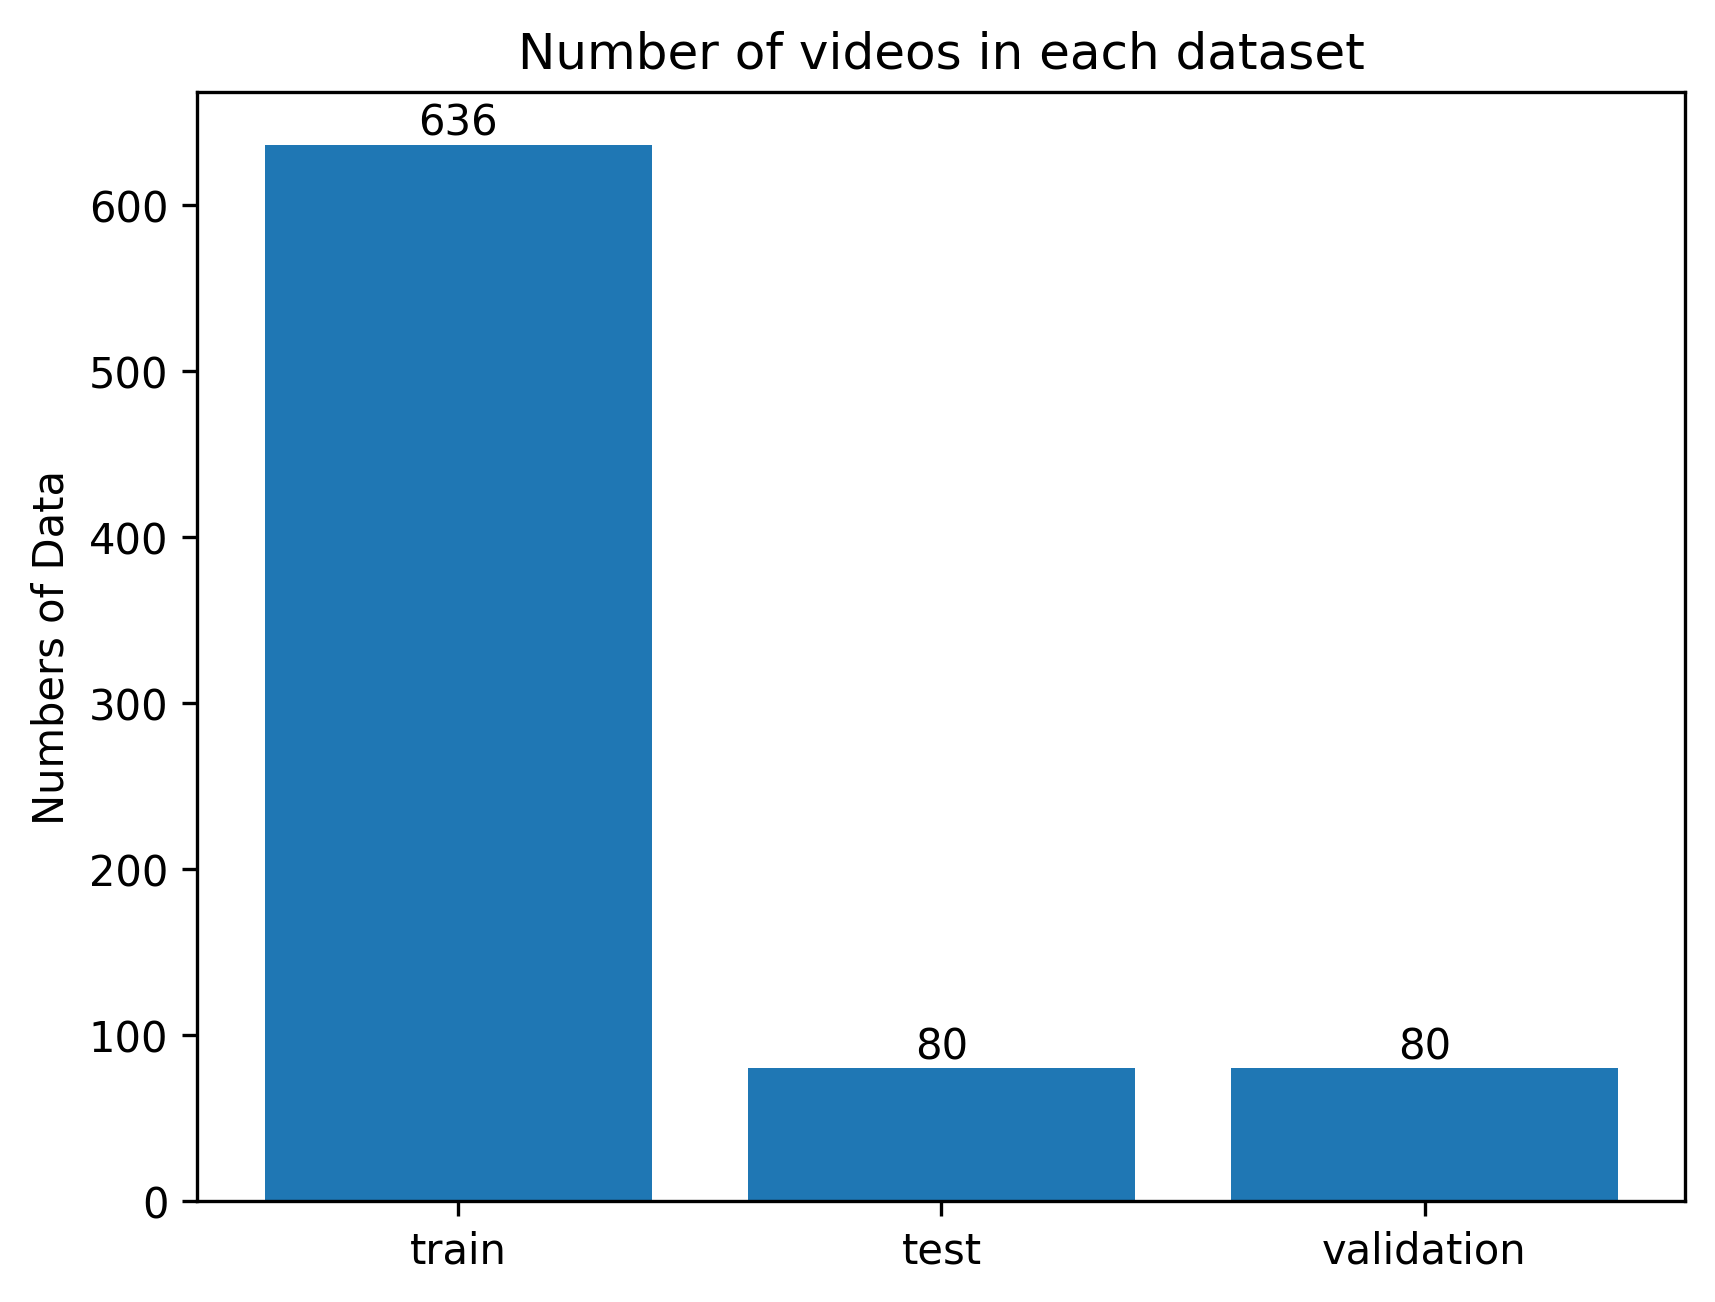

In [447]:
# Create a sample DataFrame
data_data = {'data_for': ['train', 'test', 'validation'],
        'value': [train_count, test_count, val_count]}

data_df = pd.DataFrame(data_data)

plt.figure(dpi=300)
# Plot a bar chart
plt.bar(data_df['data_for'], data_df['value'])

# Add labels and title
plt.ylabel('Numbers of Data')
plt.title('Number of videos in each dataset')

for i, value in enumerate(data_df['value']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
    
# Show the plot
plt.show()

In [448]:
columns_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split','count']

# Drop the specified columns
eda_sub_df = join_df.copy()
eda_sub_df = eda_sub_df.drop(columns=columns_to_drop)

print(eda_sub_df.columns)

Index(['Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink'],
      dtype='object')


In [449]:
# Sum the occurrences of 1 in each column
sub_column_sums =eda_sub_df.sum(axis=0)
print(sub_column_sums)


Healthy Lifestyle and Weight Loss     76
Weight Lifting                        89
Running                               76
Yoga                                  73
Haircare                               8
Makeup                               121
Skincare                              66
Outfit                                90
Accommodation                         32
Adventure                            172
Culture                               54
Food and drink                        57
dtype: int64


In [450]:
# Create a new DataFrame from the result
result_sub_df = pd.DataFrame({'Sub Label Name': sub_column_sums.index, 'Counts': sub_column_sums.values})
print(result_sub_df)

                       Sub Label Name  Counts
0   Healthy Lifestyle and Weight Loss      76
1                      Weight Lifting      89
2                             Running      76
3                                Yoga      73
4                            Haircare       8
5                              Makeup     121
6                            Skincare      66
7                              Outfit      90
8                       Accommodation      32
9                           Adventure     172
10                            Culture      54
11                     Food and drink      57


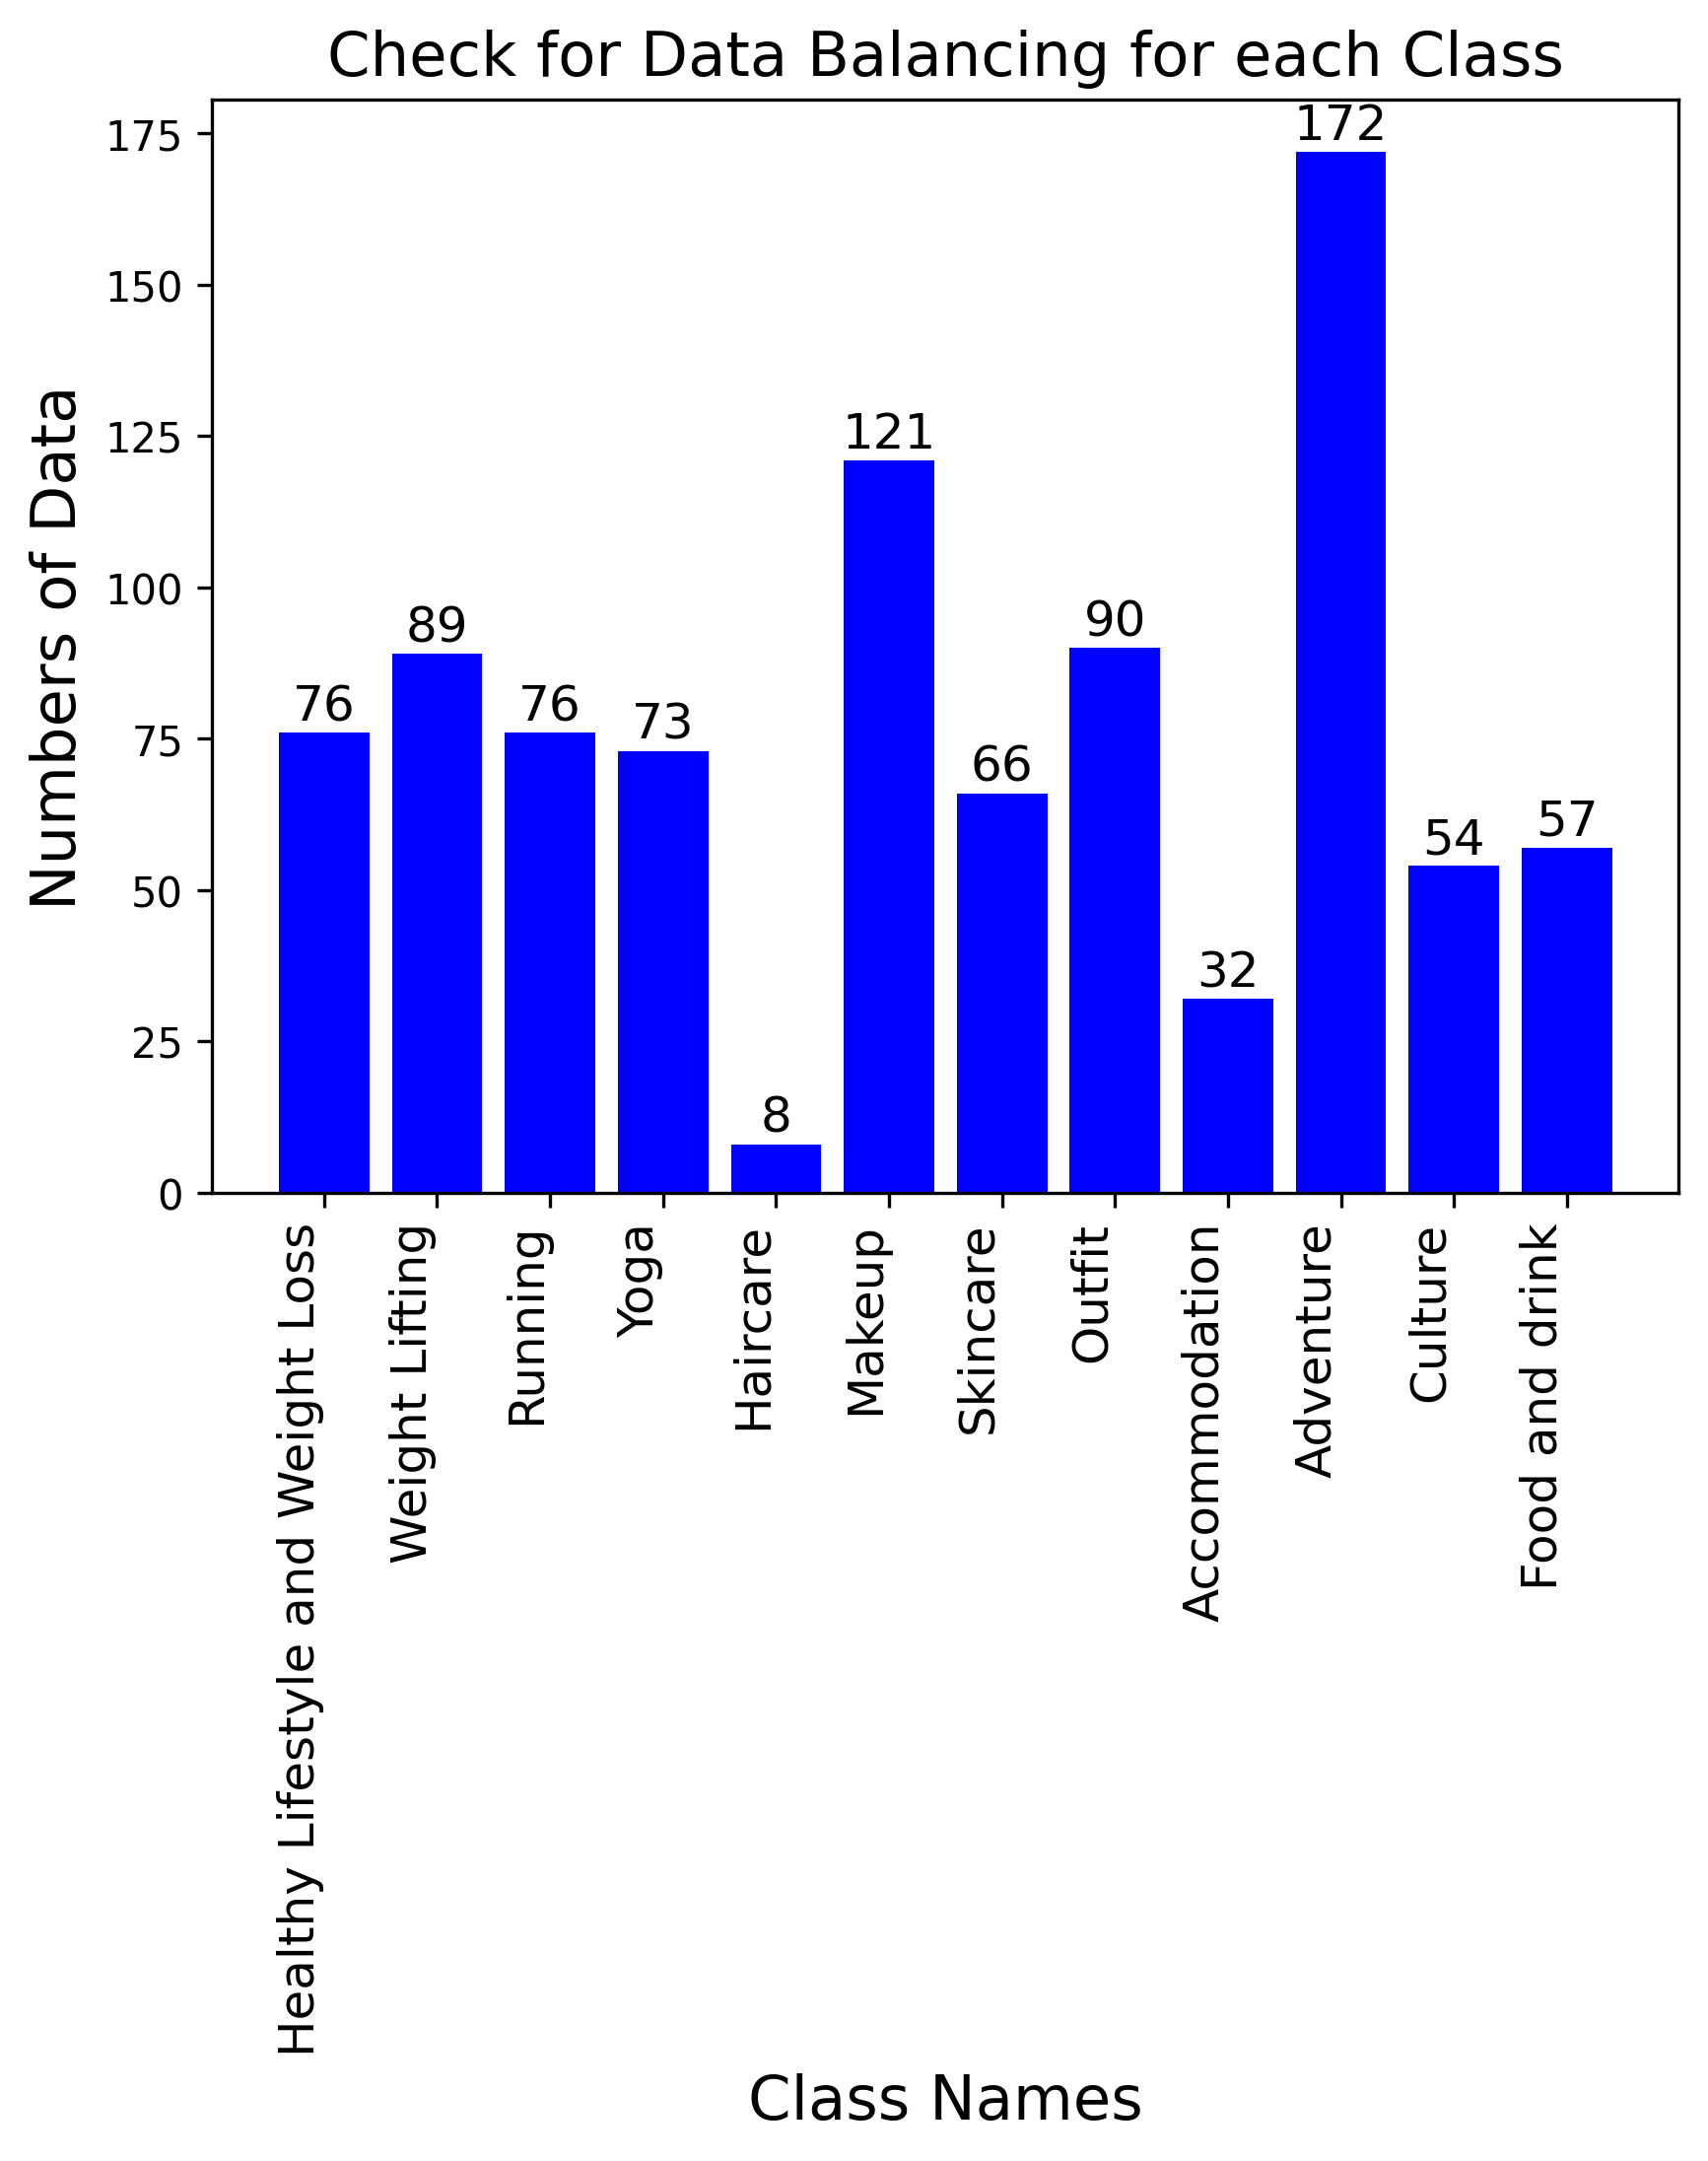

In [451]:
# Plot a bar chart
plt.figure(dpi=300)
plt.bar(result_sub_df['Sub Label Name'], result_sub_df['Counts'], color = 'blue')

# Add labels and title
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Numbers of Data', fontsize = 15)
plt.title('Check for Data Balancing for each Class', fontsize = 15)
plt.xticks(rotation=90, ha='right', fontsize = 12)

# Annotate each bar with its corresponding value
for i, value in enumerate(result_sub_df['Counts']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize = 12)
    
# Show the plot
plt.show()

In [452]:
# Extract the 'duration' column
duration_column = join_df['duration']

# Calculate max, min, mean, and standard deviation
max_duration = duration_column.max()
min_duration = duration_column.min()
mean_duration = duration_column.mean()
std_dev_duration = duration_column.std()

# Print the results
print(f'Max Duration: {max_duration:.1f}', 'seconds')
print(f'Min Duration: {min_duration:.1f}', 'seconds')
print(f'Mean Duration: {mean_duration:.1f}', 'seconds')
print(f'Standard Deviation Duration: {std_dev_duration:.1f}', 'seconds')

Max Duration: 600.0 seconds
Min Duration: 5.6 seconds
Mean Duration: 64.8 seconds
Standard Deviation Duration: 67.0 seconds


Text(0.5, 1.0, 'Distribution of Duration (seconds)')

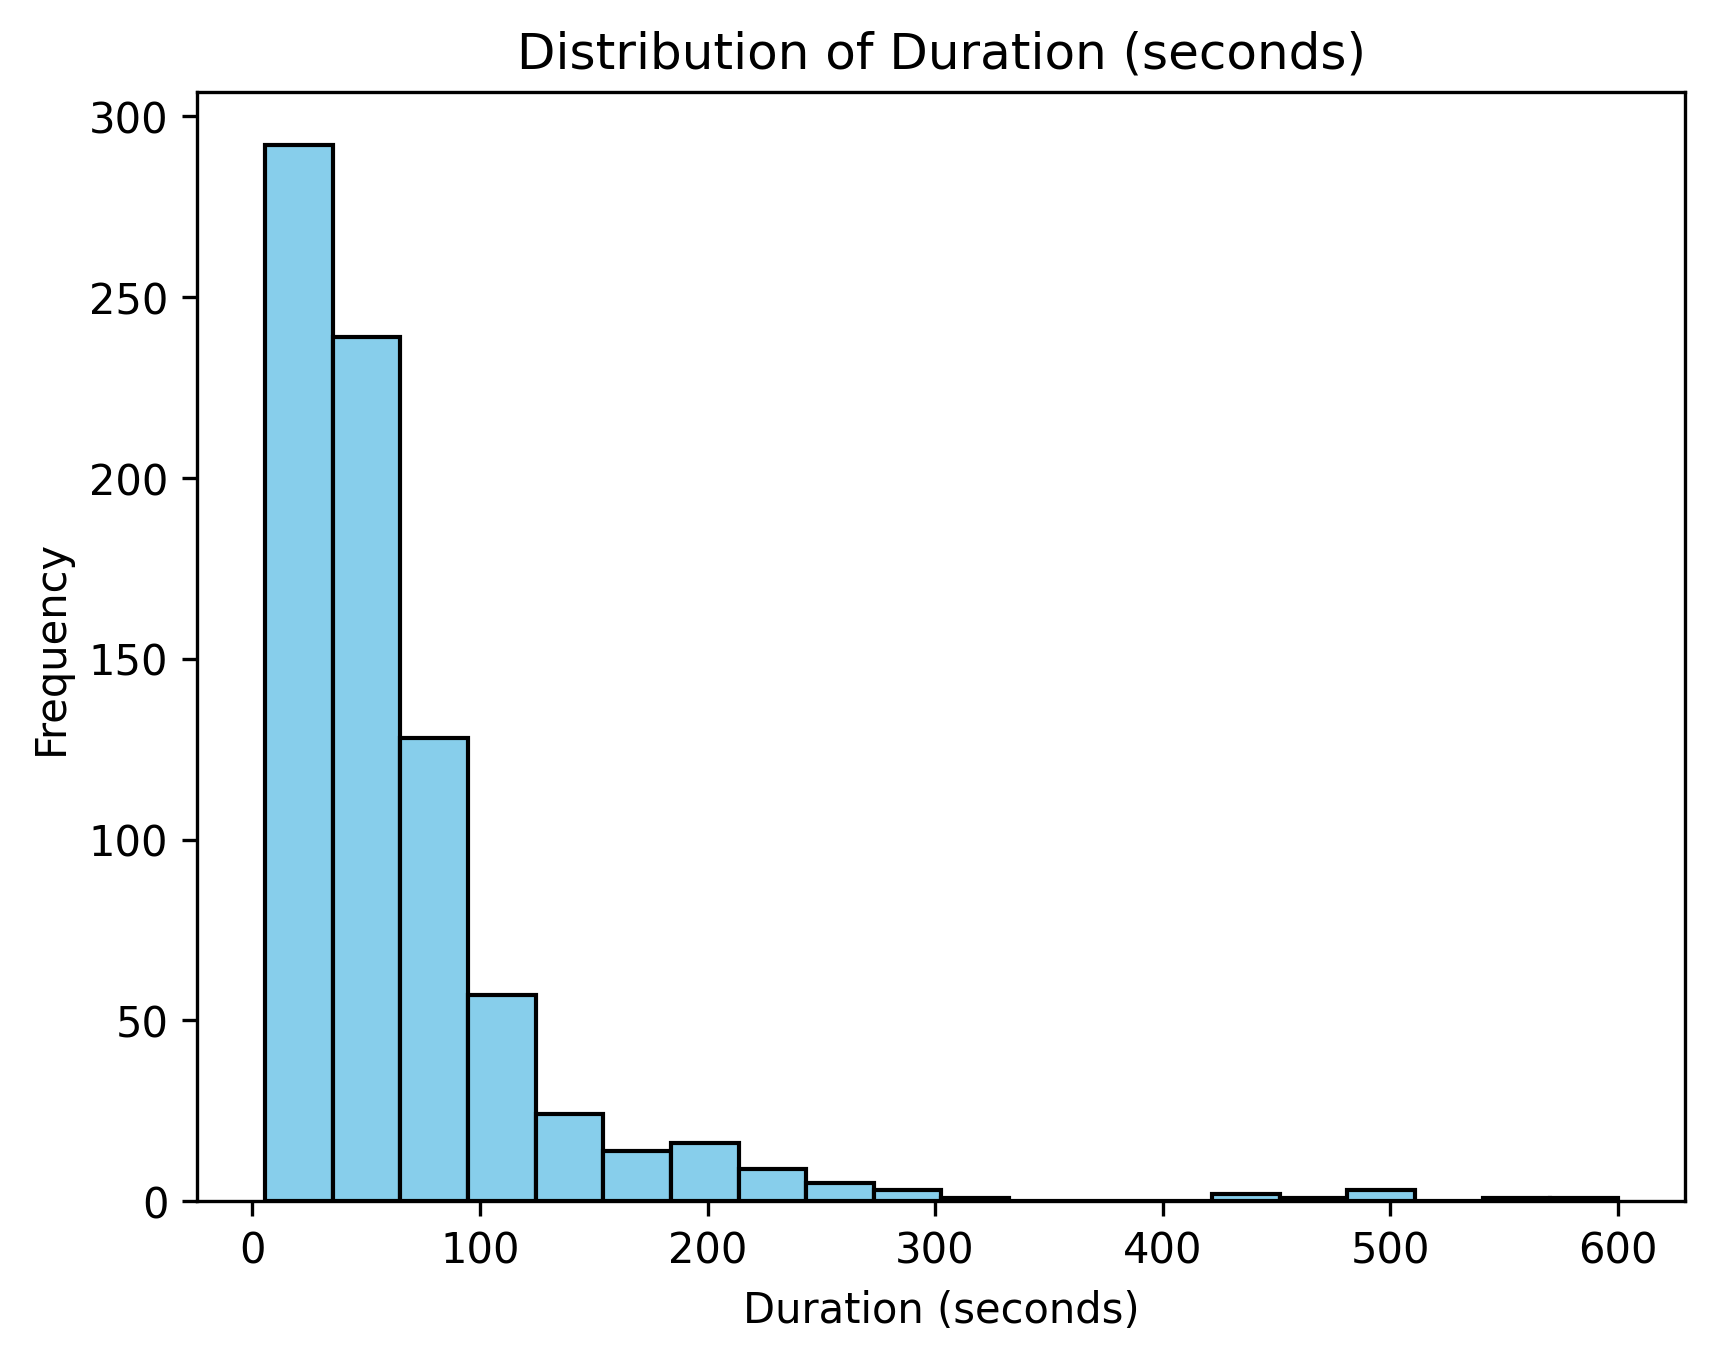

In [453]:
# Plot histogram
plt.figure(dpi=300)
plt.hist(duration_column, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration (seconds)')

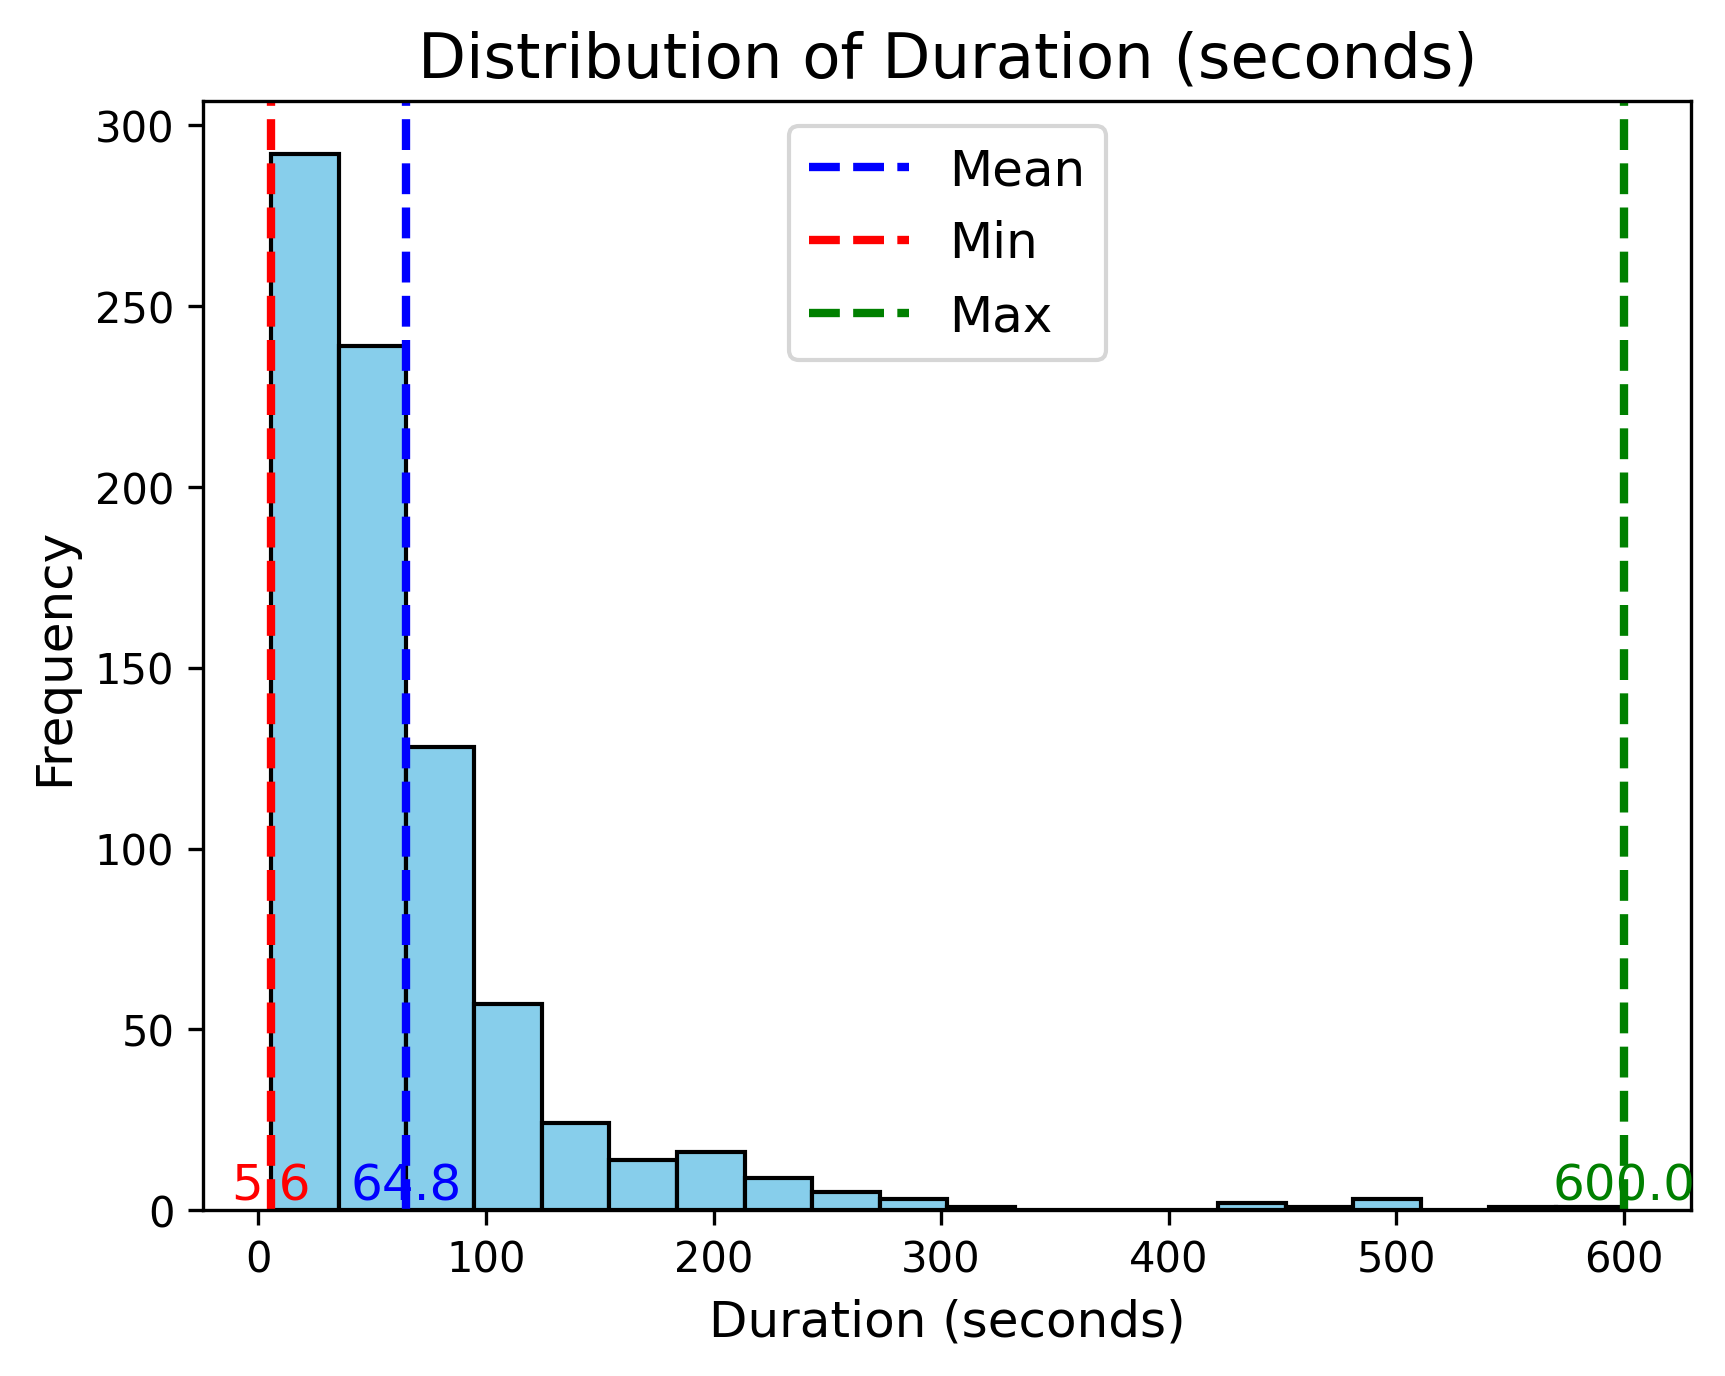

In [454]:
# Plot histogram
plt.figure(dpi=300)
plt.hist(duration_column, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Duration (seconds)', fontsize =12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Distribution of Duration (seconds)', fontsize = 15)

# Add vertical lines for mean and standard deviation
plt.axvline(mean_duration, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(min_duration, color='red', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_duration, color='green', linestyle='dashed', linewidth=2, label='Max')

plt.legend(loc='upper center', fontsize = 12)

# Add labels for min, max, mean, and sd
plt.text(min_duration, 0, f'{min_duration:.1f}', rotation=0, va='bottom', ha = 'center', fontsize = 12, color = 'red')
plt.text(max_duration, 0, f'{max_duration:.1f}', rotation=0, va='bottom', ha='center', fontsize = 12, color = 'green')
plt.text(mean_duration, 0, f'{mean_duration:.1f}', rotation=0, va='bottom', ha='center', fontsize = 12, color = 'blue')

# Show the plot
plt.show()

In [455]:
train_label = pd.read_csv('data/train_label.csv')
test_label = pd.read_csv('data/test_label.csv')
val_label = pd.read_csv('data/validate_label.csv')

In [456]:
train_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
train_sub_df = train_label.drop(columns=train_to_drop)

print(train_sub_df.columns)

Index(['Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink'],
      dtype='object')


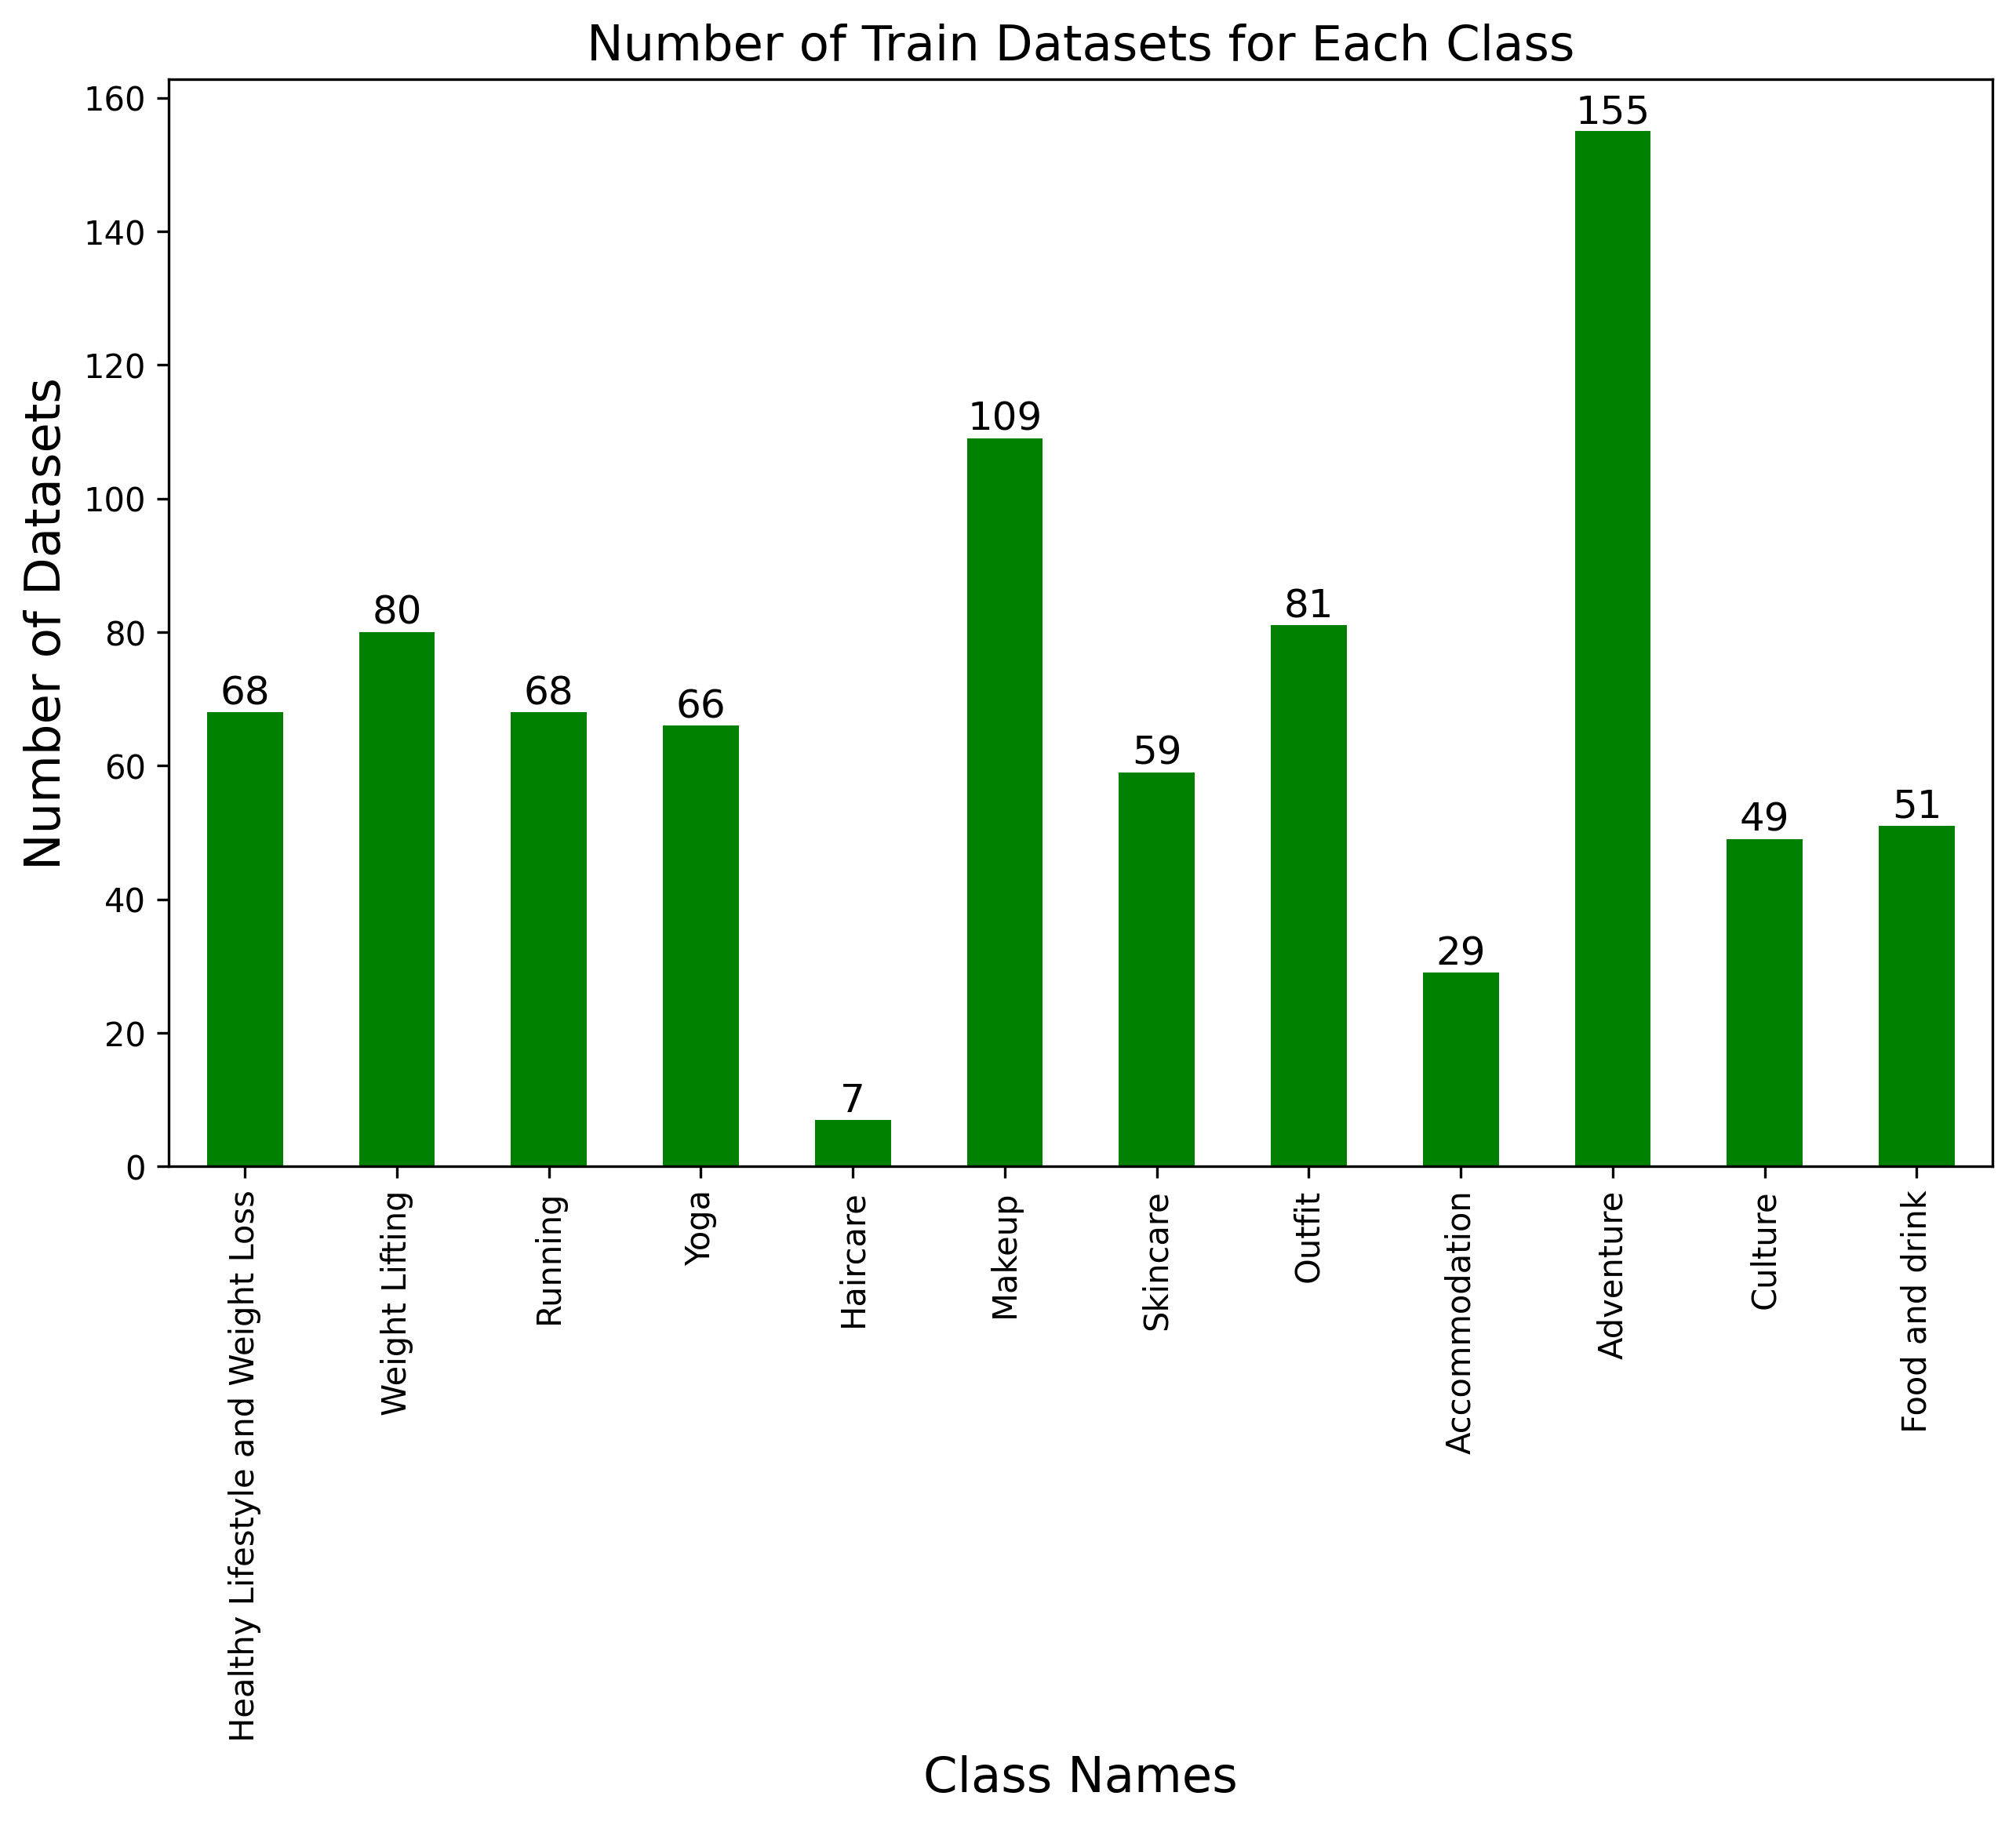

In [457]:
# Count the number of 1s for each column
count_series_train = train_sub_df.sum()

plt.figure(dpi=300)
# Plot the bar chart
count_series_train.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Number of Train Datasets for Each Class', fontsize = 15)
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Number of Datasets', fontsize = 15)

for i, v in enumerate(count_series_train):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize = 12)
plt.show()

In [458]:
test_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
test_sub_df = test_label.drop(columns=test_to_drop)

print(test_sub_df.columns)

Index(['Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink'],
      dtype='object')


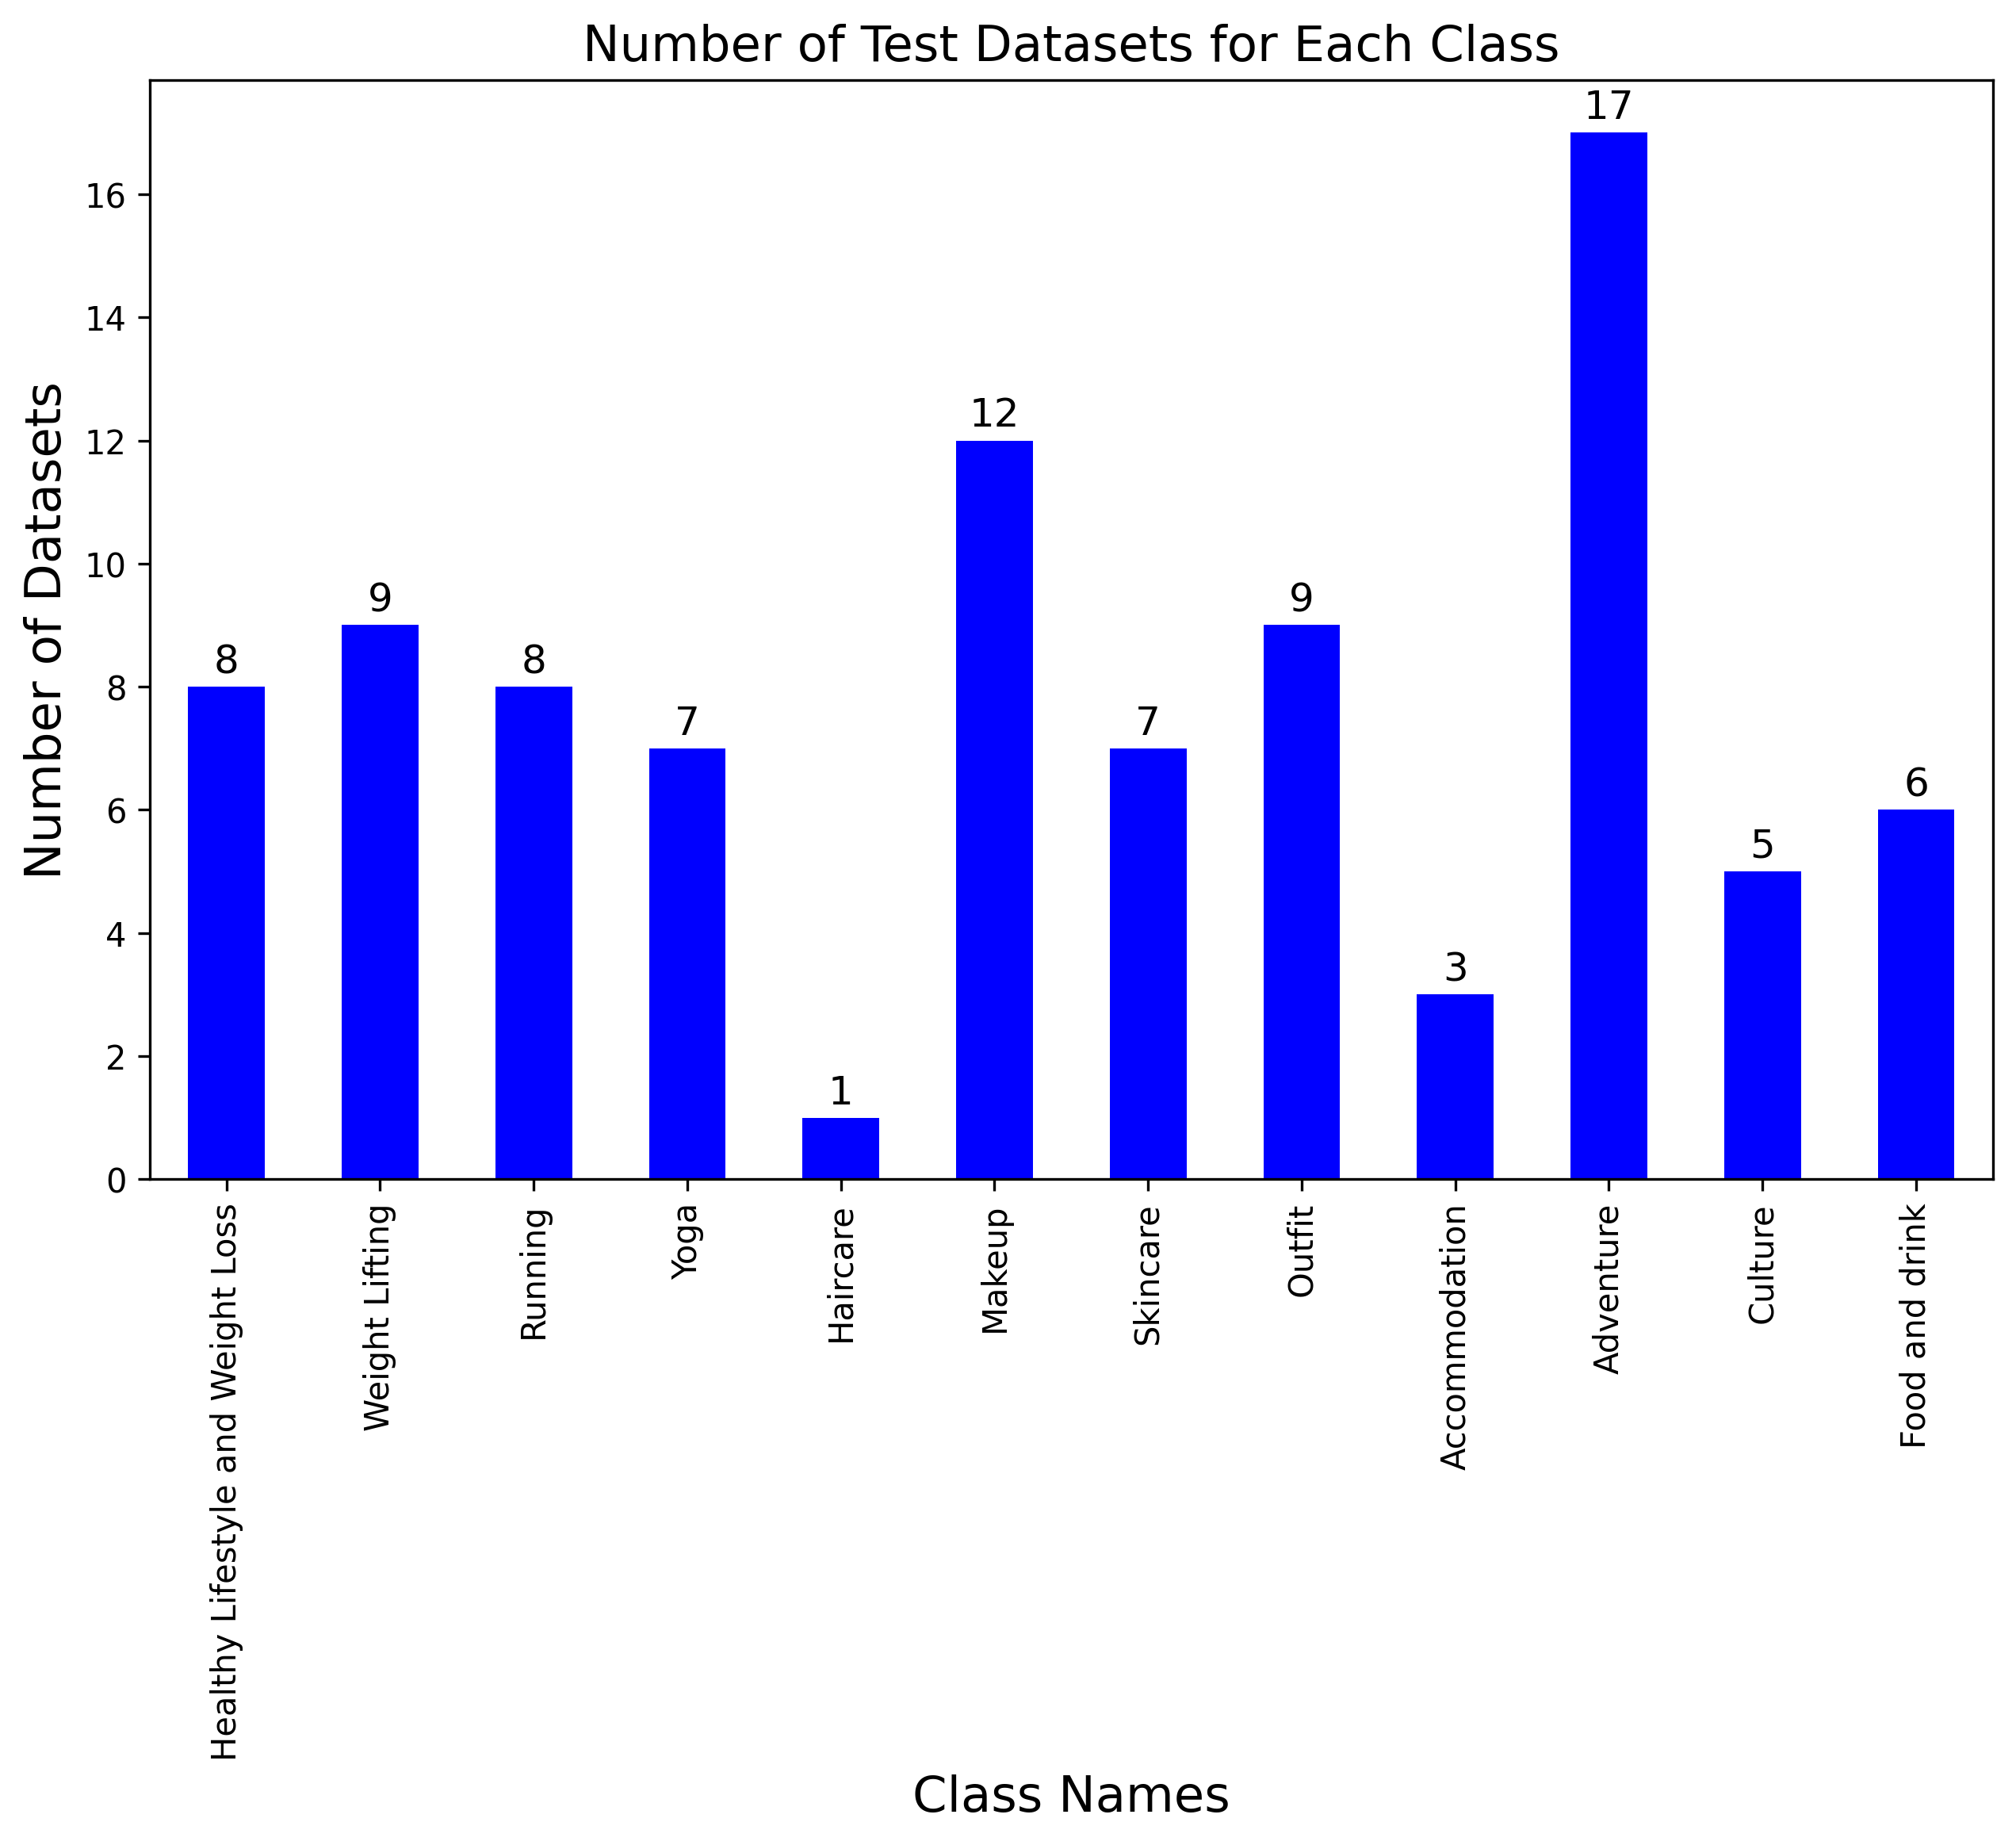

In [459]:
# Count the number of 1s for each column
count_series_test = test_sub_df.sum()

plt.figure(dpi=300)
# Plot the bar chart
count_series_test.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Number of Test Datasets for Each Class', fontsize = 15)
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Number of Datasets', fontsize = 15)

for i, v in enumerate(count_series_test):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize = 12)
plt.show()

In [460]:
val_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
val_sub_df = val_label.drop(columns=val_to_drop)

print(val_sub_df.columns)

Index(['Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink'],
      dtype='object')


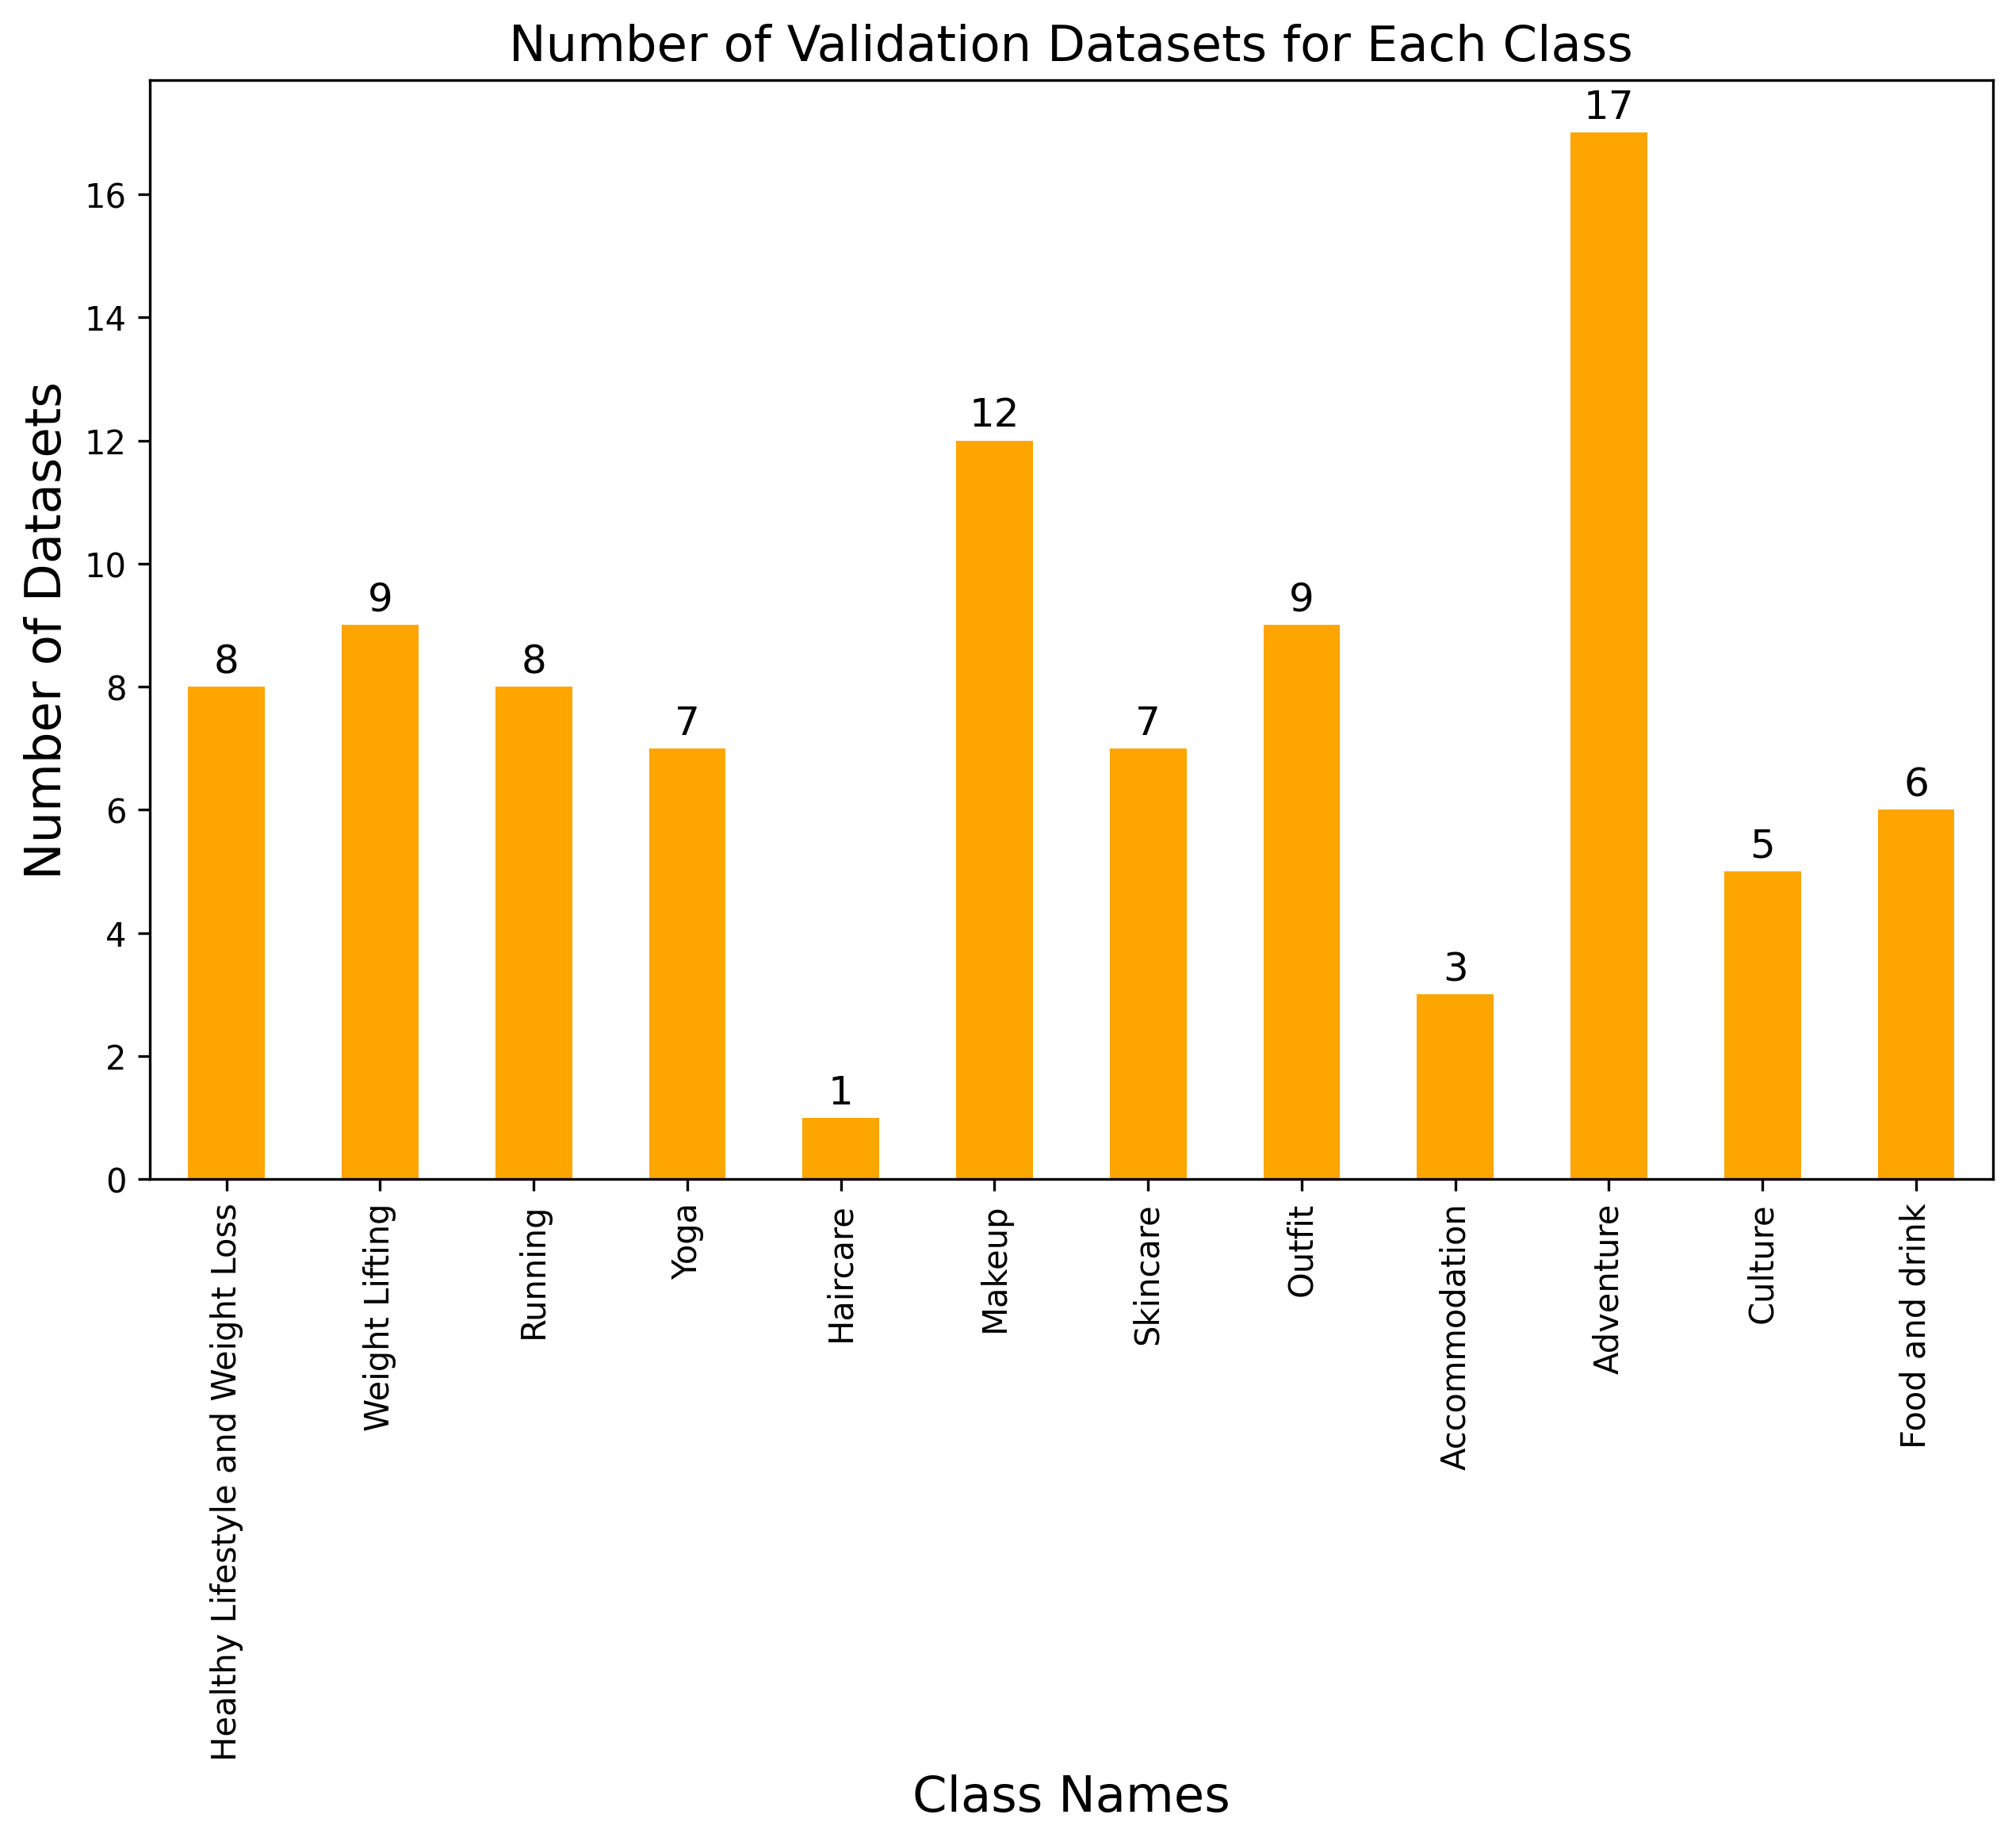

In [461]:
# Count the number of 1s for each column
count_series_val = val_sub_df.sum()

plt.figure(dpi=300)
# Plot the bar chart
count_series_val.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Validation Datasets for Each Class', fontsize = 15)
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Number of Datasets', fontsize = 15)

for i, v in enumerate(count_series_val):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

In [462]:
# train_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

# #Drop the specified columns
# train_dur_df = train_label.drop(columns=train_to_drop)

# print(train_dur_df)

In [463]:
# test_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

# # Drop the specified columns
# test_dur_df = test_label.drop(columns=test_to_drop)

# print(test_dur_df)

In [464]:
# val_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

# # Drop the specified columns
# val_dur_df = val_label.drop(columns=val_to_drop)

# print(val_dur_df)

In [465]:
columns_to_drop2 = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split','count']

# Drop the specified columns
eda_dur_df = join_df.copy()
eda_dur_df = eda_dur_df.drop(columns=columns_to_drop2)

print(eda_dur_df.columns)

Index(['Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink', 'duration'],
      dtype='object')


In [466]:
# Create a new DataFrame with the product of 'duration' and each of the other 12 columns
product_df = eda_dur_df.copy()  # Copy the original DataFrame

# Multiply each column (except 'duration') by the 'duration'
for col in eda_dur_df.columns[:-1]:  # Exclude the last column 'duration'
    product_df[col] = product_df[col] * product_df['duration']

# Drop the 'duration' column as it's no longer needed
product_df = product_df.drop(columns=['duration'])

# Print the new DataFrame
print(product_df.columns)

Index(['Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink'],
      dtype='object')


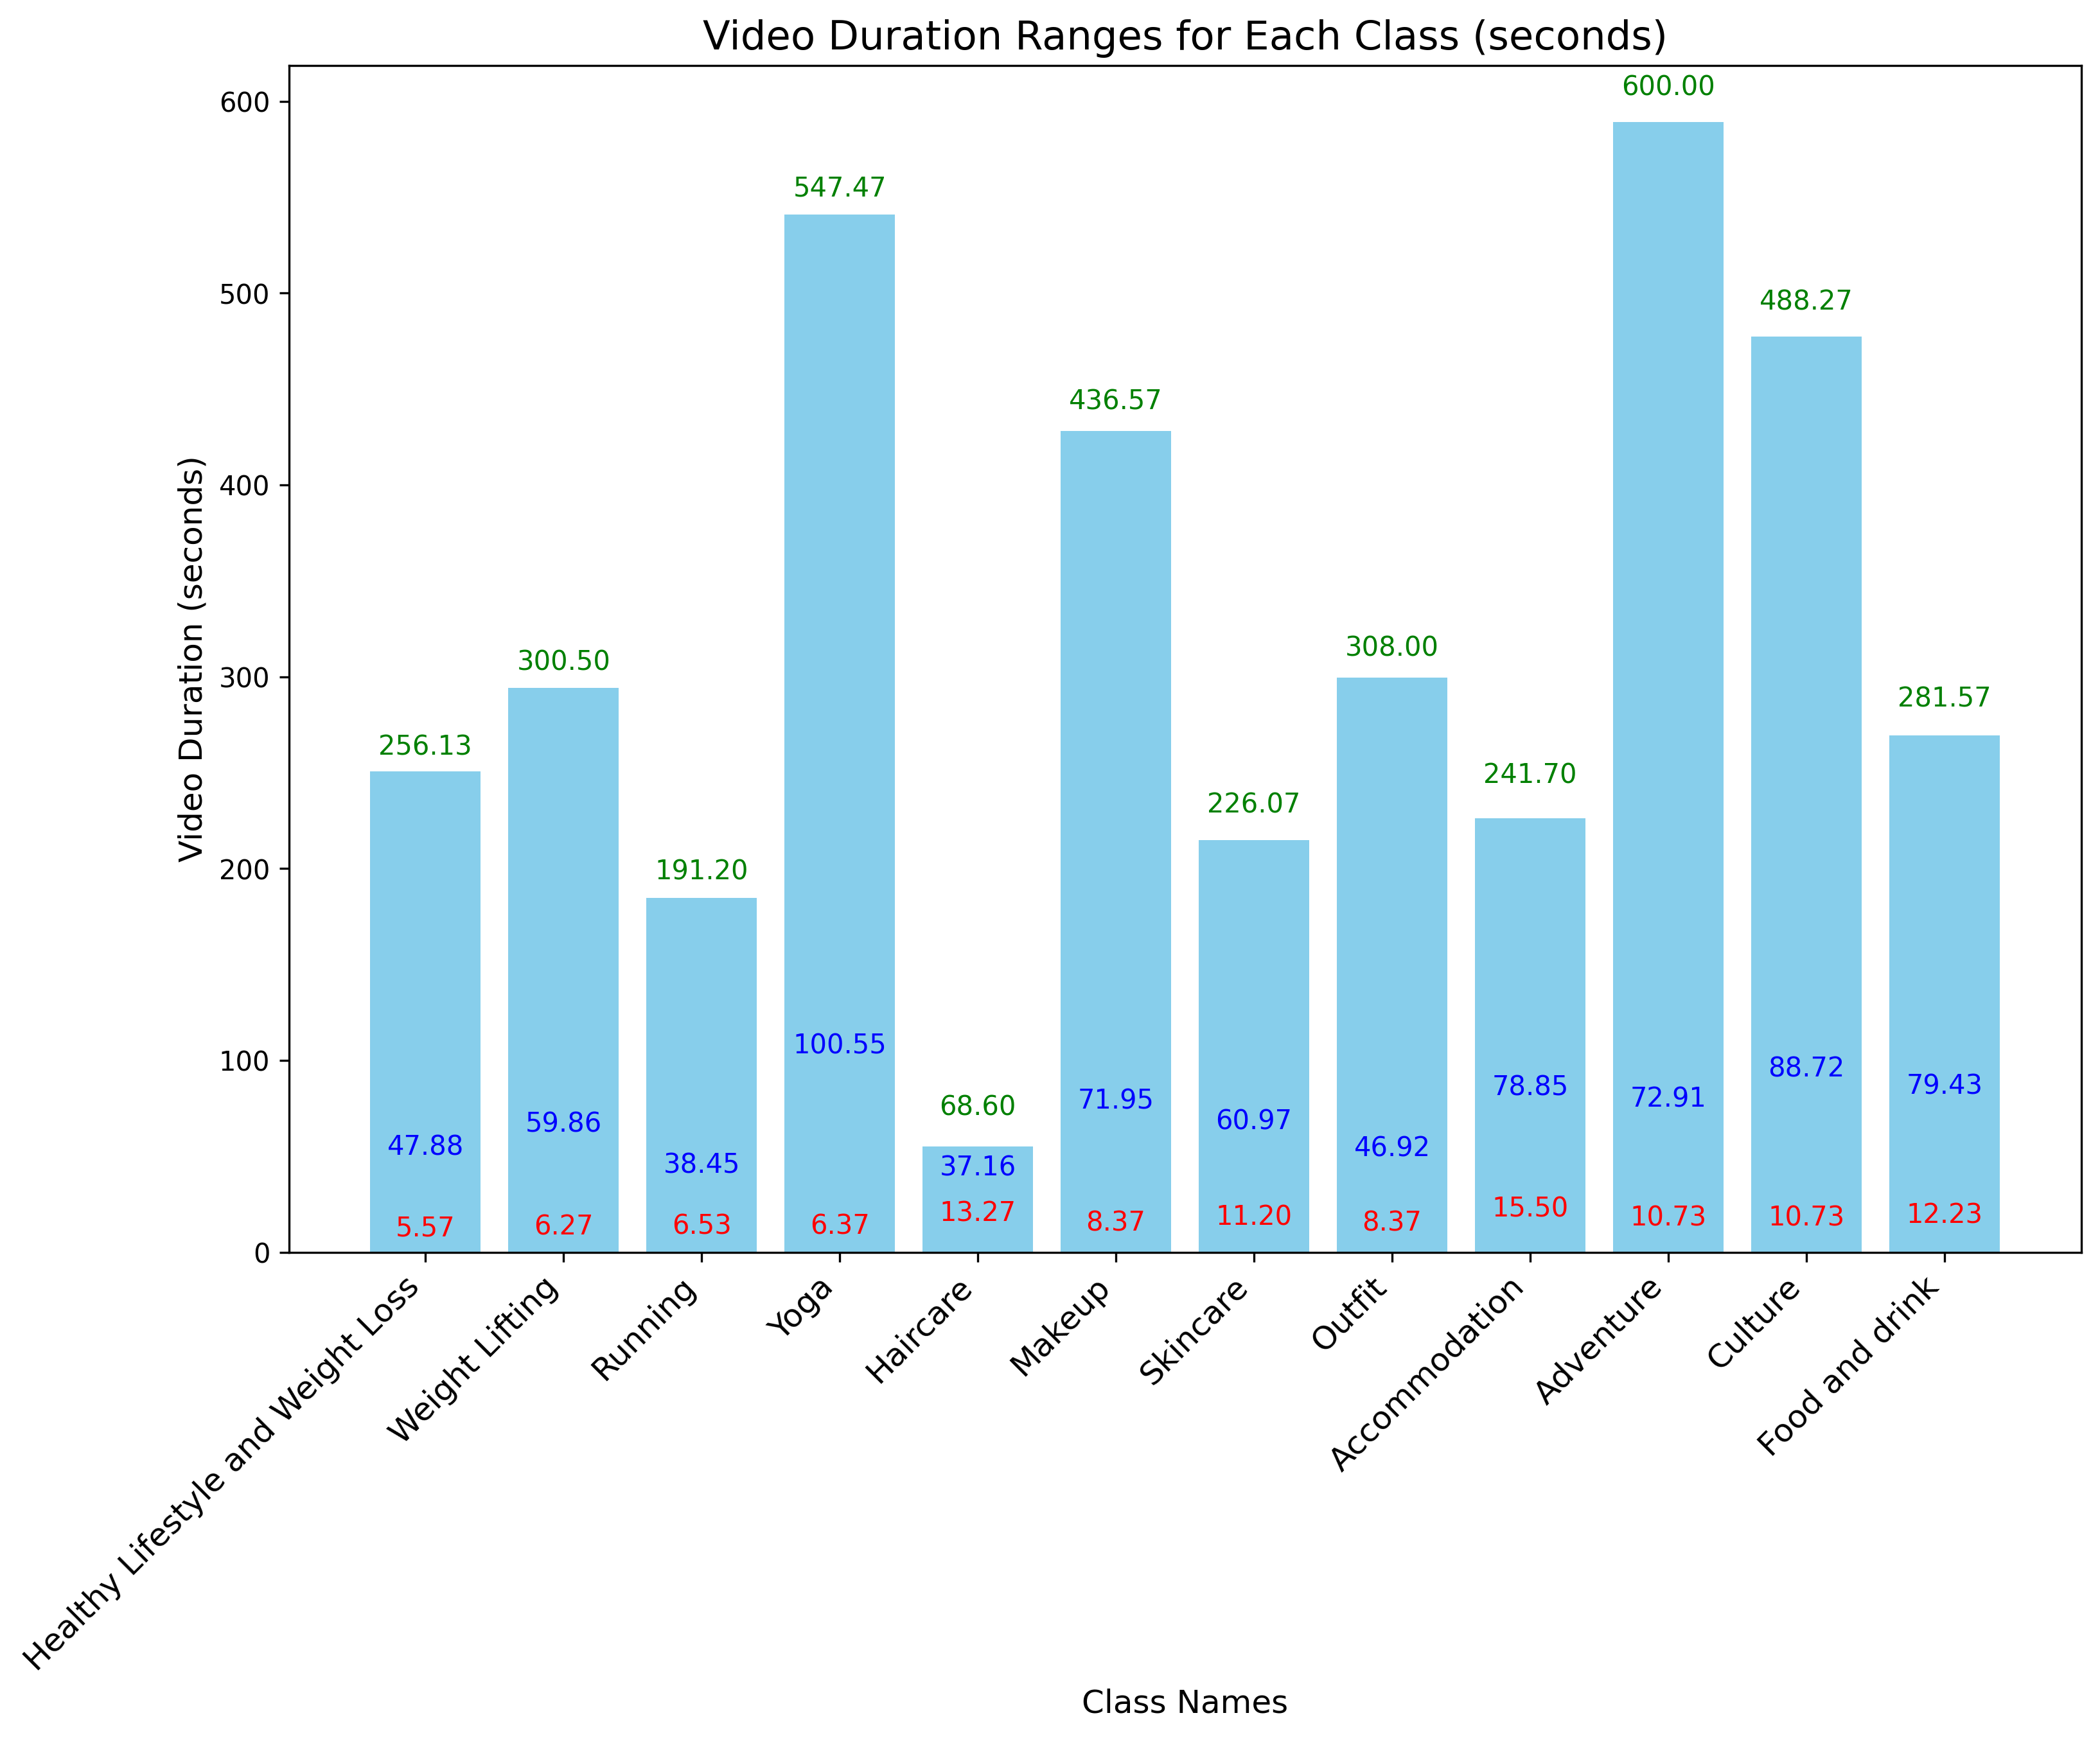

In [467]:
# Calculate min, max, and mean for each column excluding values equal to 0
stats_df = pd.DataFrame({
    'Min': product_df[product_df != 0].min(),
    'Max': product_df[product_df != 0].max(),
    'Mean': product_df[product_df != 0].mean()
})

plt.figure(figsize=(12, 8),dpi=300)

for column in stats_df.index:
    plt.bar(column, stats_df.loc[column, 'Max'] - stats_df.loc[column, 'Min'], label=column, color='skyblue')
    plt.text(column, stats_df.loc[column, 'Max'], f"{stats_df.loc[column, 'Max']:.2f}", ha='center', va='bottom', rotation=0, fontsize=10, color = 'green')
    plt.text(column, stats_df.loc[column, 'Mean'], f"{stats_df.loc[column, 'Mean']:.2f}", ha='center', va='bottom', rotation=0, fontsize=10, color = 'blue')
    plt.text(column, stats_df.loc[column, 'Min'], f"{stats_df.loc[column, 'Min']:.2f}", ha='center', va='bottom', rotation=0, fontsize=10, color = 'red')

# Configure plot labels and legend
plt.title("Video Duration Ranges for Each Class (seconds)", fontsize = 15)
plt.xlabel("Class Names", fontsize=12)
plt.ylabel("Video Duration (seconds)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

In [468]:
multi = pd.read_csv('data/data_set_label.csv')

In [469]:
multi

,No,filename,data_split,Links,main_label,sub_label,Healthy Lifestyle and Weight Loss,Weight Lifting,Running,Yoga,...,Accommodation,Adventure,Culture,Food and drink,duration,frame_count,height,width,fps,count
0,1,Beauty_1.mp4,test,https://www.tiktok.com/@zo_pim/video/730578817...,Beauty and Fashion,Haircare,0,0,0,0,...,0,0,0,0,34.633333,1039,1024,576,30,1
1,2,Beauty_2.mp4,train,https://www.tiktok.com/@zomtichamakeover/video...,Beauty and Fashion,Makeup,0,0,0,0,...,0,0,0,0,25.266667,758,1024,576,30,1
2,3,Beauty_3.mp4,test,https://www.tiktok.com/@babyjingko/video/73128...,Beauty and Fashion,Makeup,0,0,0,0,...,0,0,0,0,38.233333,1147,1024,576,30,1
3,4,Beauty_4.mp4,train,https://www.tiktok.com/@baifarm/video/73056464...,Beauty and Fashion,Makeup,0,0,0,0,...,0,0,0,0,64.600000,1938,1024,576,30,1
4,5,Beauty_5.mp4,validation,https://www.tiktok.com/@fahzii2535/video/73055...,Beauty and Fashion,Makeup,0,0,0,0,...,0,0,0,0,105.833333,3175,1024,576,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,218,Travel_218.mp4,train,https://www.tiktok.com/@paikuble/video/7208202...,Travel,Adventure,0,0,0,0,...,0,1,0,0,22.533333,676,1024,576,30,1
792,219,Travel_219.mp4,train,https://www.tiktok.com/@paikuppy/video/7312985...,Travel,Adventure,0,0,0,0,...,0,1,0,0,94.066667,2822,1024,576,30,1
793,220,Travel_220.mp4,train,https://www.tiktok.com/@pang_ww/video/73153383...,Travel,Adventure,0,0,0,0,...,0,1,0,0,55.866667,1676,1024,576,30,1
794,221,Travel_221.mp4,train,https://www.tiktok.com/@pattypieeekaa/video/72...,Travel,Adventure,0,0,0,0,...,0,1,0,0,85.800000,2574,1024,576,30,1


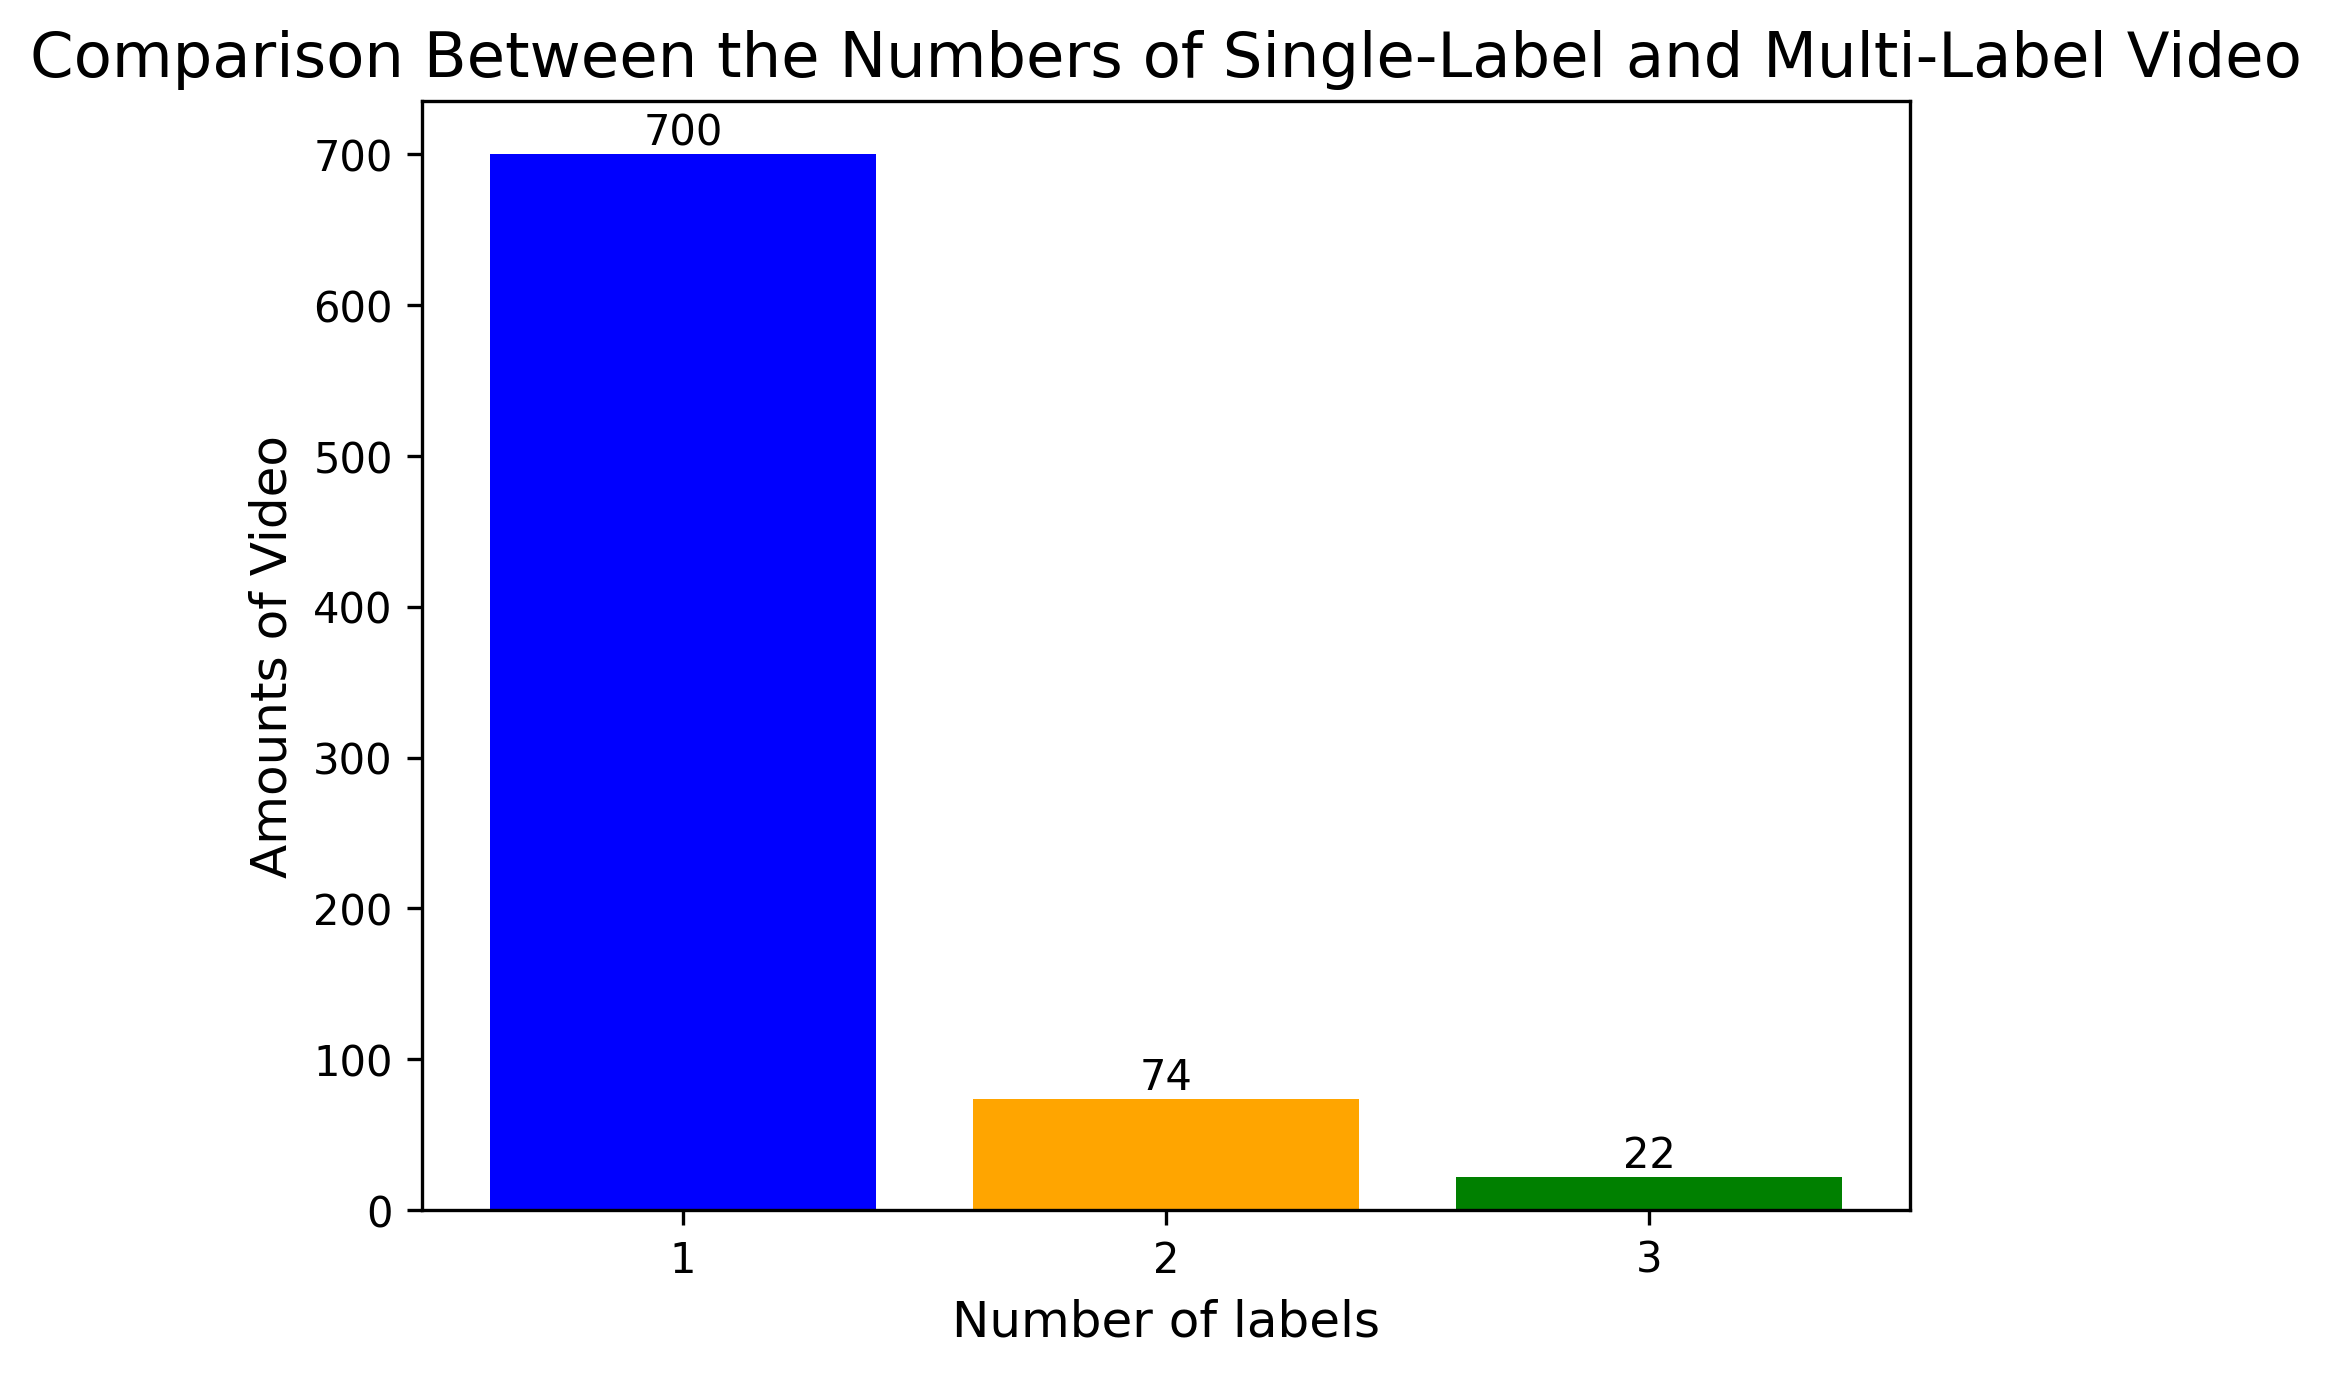

In [470]:
# Extract the 'count' column
count_column = multi['count']

# Count occurrences of 1, 2, and 3
count_1 = count_column[count_column == 1].count()
count_2 = count_column[count_column == 2].count()
count_3 = count_column[count_column == 3].count()

# Plot a bar chart
counts = [count_1, count_2, count_3]
labels = ['1', '2', '3']
plt.figure(dpi=300)
plt.bar(labels, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Number of labels', fontsize=12)
plt.ylabel('Amounts of Video',fontsize=12)
plt.title('Comparison Between the Numbers of Single-Label and Multi-Label Video', fontsize = 15)

for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
    
plt.show()